# Разведочный анализ данныx (EDA)

# Оглавление

# 1. Введение
_____

**Разведочный анализ данных** — это предварительный анализ данных, который проводится с целью определения основных характеристик данных, закономерностей и тенденций, взаимосвязей между признаками, а также для сужения набора методов, используемых для создания моделей машинного обучения.


Термин «разведочный анализ» введен математиком из Принстонского университета Дж. Тьюки. Он сформулировал основные **цели разведочного анализа данных**:

- Максимальное «проникновение» в данные.
- Выявление основных структур.
- Выбор наиболее важных переменных.
- Обнаружение отклонений и аномалий.
- Проверка основных гипотез (предположений).
- Разработка начальных моделей.

Основное **назначение разведочного анализа данных** - это помощь в разработке лучшей стратегии углубленного анализа, выдвижение гипотез, выбор математических методов и моделей, в том числе моделей машинного обучения. Без разведочного анализа углубленный анализ данных будет производиться практически «вслепую» без четкого понимания данных.

Нужно также отметить, что результаты разведочного анализа **нельзя использовать для разработки и принятия управленческих решений**.

К основным **методам разведочного анализа относятся**: 
- Анализа распределений переменных. 
- Корреляционный анализ. 
- Факторный анализ. 
- Дискриминантный анализ. 
- Многомерное шкалирование.
- Визуальный анализ гистограмм и т.д.

Разведочный анализ данных это лишь первый этап. Пока **результаты** разведочного анализа не подтверждены на других выборках или на независимом множестве данных, их **следует воспринимать как гипотезу**.

# 2. Объект анализа
____

## 2.1 Общая информация 

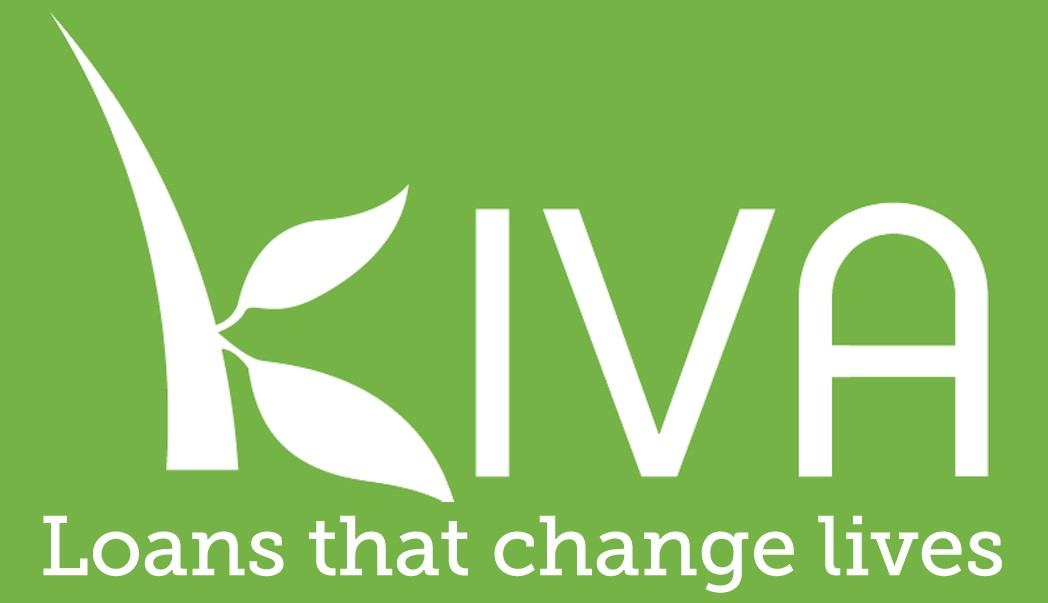

[Kiva.org](https://www.kiva.org/) — это **онлайн-платформа краудфандинга** для предоставления **финансовых услуг бедным** и финансово изолированным людям во всем мире. Каждый может дать кредит тем людям, которым нужно немного денег и помощи для того, чтобы реализовать свою идею.

По данным сайта Kiva.org более 1,7 миллиарда человек во всем мире не пользуются банковскими услугами и не могут получить доступ к необходимым им финансовым услугам. **Миссия Kiva - расширить доступ к финансированию**, чтобы помочь процветанию недостаточно обслуживаемых сообществ.

## 2.2 Как работает компания 

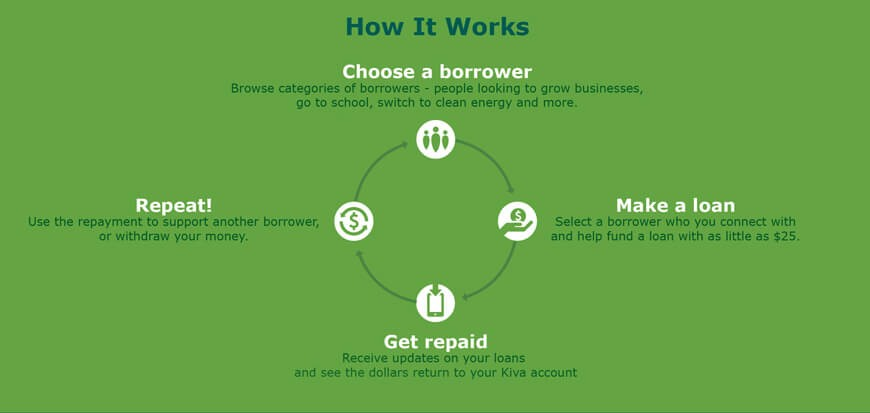

Kiva работает через партнеров, которые занимаются управлением кредитами в регионах – работают с местным населением, находят людей, которые нуждаются в помощи, оформляют и публикуют их профили и заявки на платформе Kiva.

Кредиторы – пользователи платформы – просматривают заявки, выбирают тех авторов, которых хотят поддержать, и дают кредиты от $25. Эти средства получает организация-партнер, которая затем передает их заемщику, а после того как заемщик возвращает средства, она передает их обратно Kiva, и они возвращаются на счет пользователя.


## 2.3 Kiva в цифрах на сегодняшний день


Kiva считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах, и считается мировым лидером в своей области. Статистика впечатляющая:

- **3,9 млн.** нуждающихся заемщиков.
- **2 млн.** участников-кредиторов.
- **77 стран**.
- **\$1,6 млрд.** - сумма средств, финансируемых через Kiva.
- **$2,5 млн.** - сумма, которую кредиторы Kiva собирают в среднем каждую неделю.


# 3. Загрузка библиотек и датасета
__________

## 3.1 Загрузка библиотек

In [5]:
import numpy as np
import pandas as pd 
import math

from datetime import datetime, timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os

from kaggle.api.kaggle_api_extended import KaggleApi

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.3f}'.format

pallete = plt.get_cmap('Set2')
sns.set_theme(style="whitegrid")
font = {'family' : 'serif',
        'weight' :'normal',
        'size'   : 13}

mpl.rc('font', **font)

## 3.2 Загрузка датасета

In [6]:
!kaggle datasets list -s 'kiva'

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kiva/data-science-for-good-kiva-crowdfunding                  Data Science for Good: Kiva Crowdfunding            42MB  2018-03-02 20:20:57          20965       1039  0.85294116       
gaborfodor/additional-kiva-snapshot                           Additional kiva snapshot                           861MB  2018-03-27 17:29:36          23207         71  0.8235294        
fkosmowski/kivadhsv1                                          Kiva.DHS.v5                                          2MB  2018-05-11 07:38:21            458         30  0.7058824        
sudalairajkumar/undata-country-profiles                       Country Stati

In [8]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("kiva/data-science-for-good-kiva-crowdfunding", path='C:\\Users\\ЯцкийНА\\Portfolio\\EDA', unzip=True)

In [12]:
df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv')

# 4. Описание датасета
____

**kiva_loans** - набор данных, который содержит наибольшее количество информации о займах:

- **id:** уникальный идентификатор кредита.
- **funded_amount:** сумма, выплаченная Kiva агенту на местах (долл.).
- **loan_amount:** cумма, выплаченная полевым агентом заемщику (USD).
- **activity:**  категория использования займа.
- **sector:** cектор использования займа.
- **use:** конкретное назначение использования займа.
- **country_code:** ISO код страны страны, в которой был выдан займ.
- **country:** полное наименование страны, в которой был выдан займ.
- **region:** полное наименование региона страны.
- **posted_time:** время, в которое заявка была опубликована на Kiva.
- **disbursed_time:** время, когда кредитный агент выдал заемщику сумму.
- **funded_time:** время, когда заявка полностью финансируется кредиторами.
- **term_in_months:** срок, на который был выдан кредит в месяцах.
- **lender_count:** общее количество кредиторов, которые внесли свой вклад в этот кредит.
- **loaner_genders:** пол заемщика. Если заемщиков несколько, указывается пол каждого заемщика через запятую.

Описаны основные признаки, которые в дальнейшем будем использовать при EDA

In [15]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.000,300.000,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.000,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.000,12,NaN,female,irregular,2014-01-01
1,653053,575.000,575.000,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.000,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.000,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.000,150.000,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.000,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.000,6,"user_favorite, user_favorite",female,bullet,2014-01-01


**kiva_mpi_region_locations** - набор данных, который содержит данные о регинах и показатели MPI (Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов в мире. Чем больше это значение, тем выше бедность в соответствующем регионе.

- **country:** полное наименование страны.
- **region:** полное наименование региона страны.
- **world_region:** часть света.
- **MPI:** многомерный индекс бедности.
- **geo:** координаты (широта, долгота).
- **lat:** широта.
- **lon:** долгота.

In [17]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.735,70.812
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167,63.770
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804,69.288


# 5. Постановка задач

# 6. Подготовка данных

###### 3. Проверяем на наличие пропущенных значений, чтобы не столкнуться неприятными сюрпризами далее 

<AxesSubplot:>

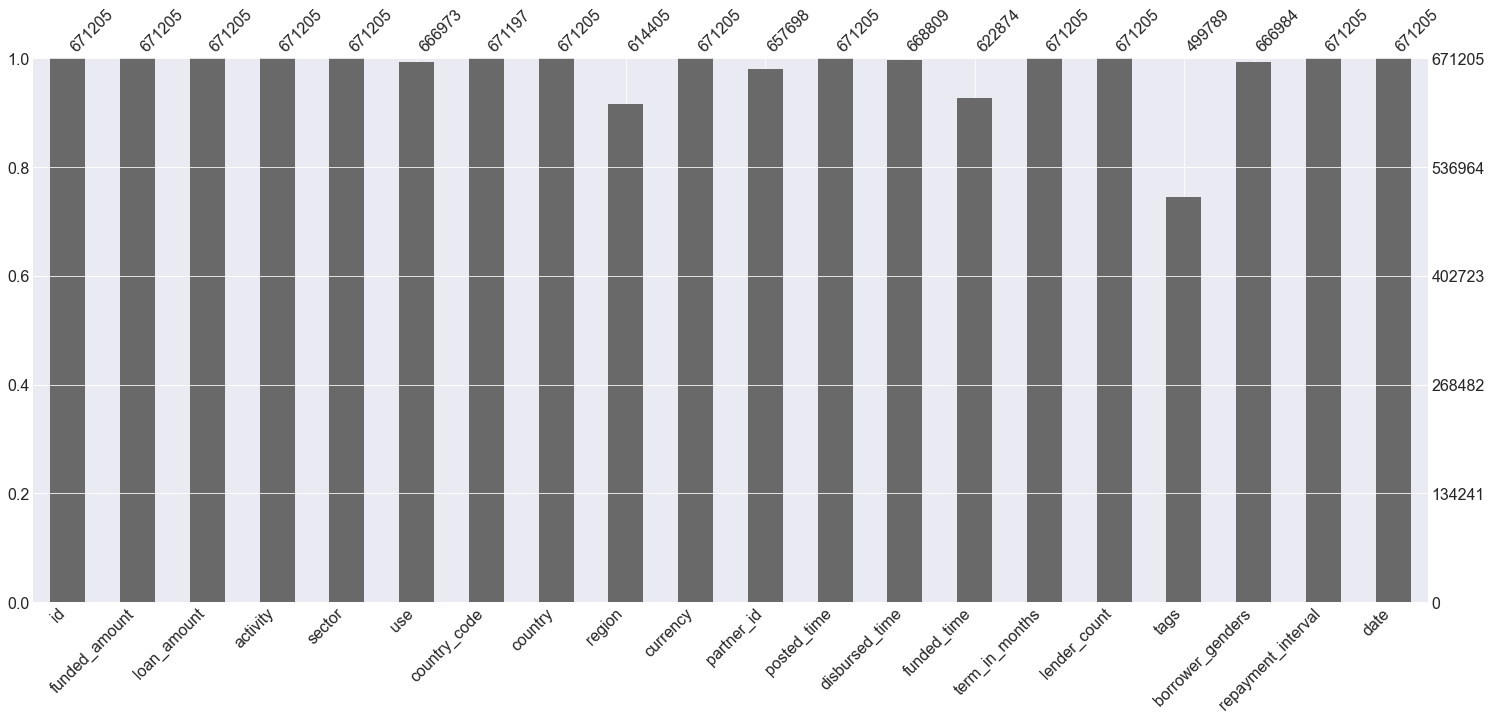

In [52]:
msno.bar(df_kiva_loans)

<AxesSubplot:>

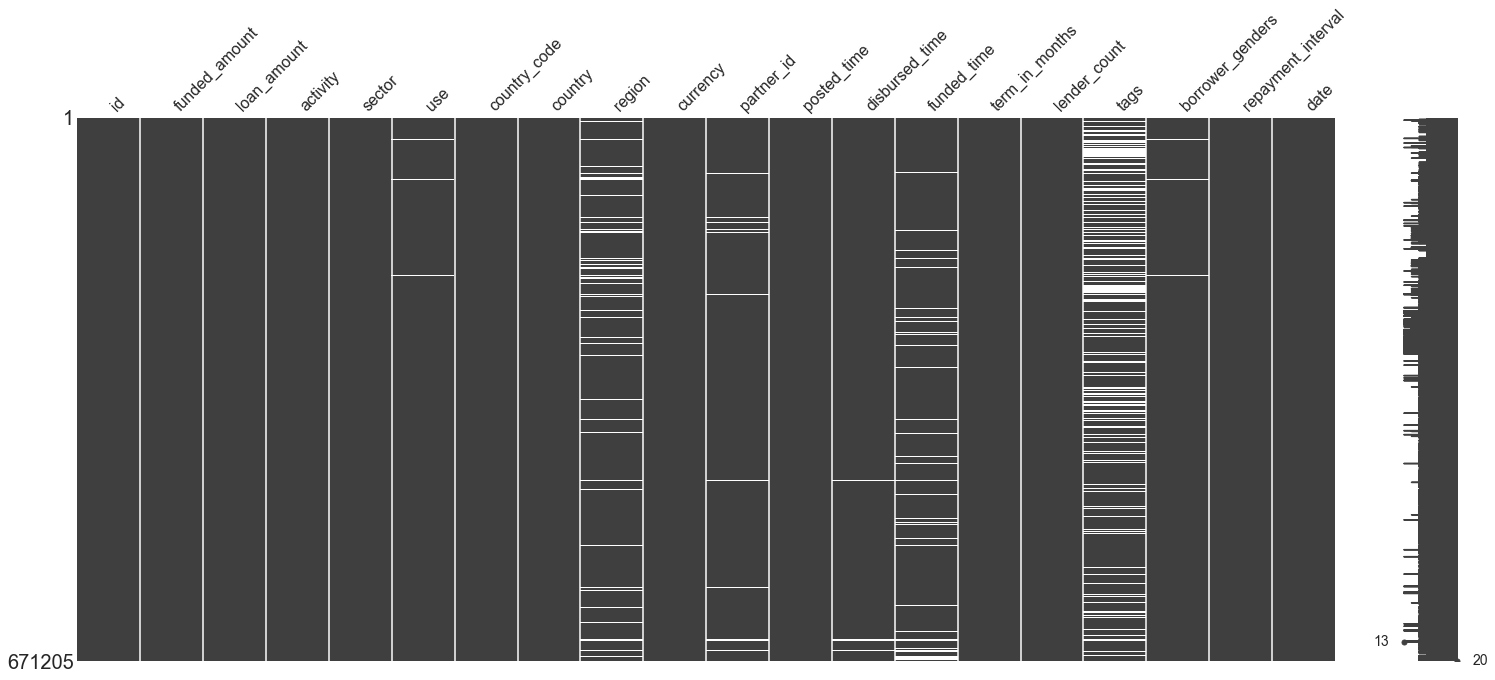

In [53]:
msno.matrix(df_kiva_loans)

**Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена  в выгрузке корректно**

##### 4. Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем статистику для каждого из них 

In [54]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

**Числовые показатели**

In [55]:


df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


**Текстовые показатели**

In [56]:
df_kiva_loans.describe(include=[np.object_])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые мы можем сделать:** 
1. В этом датасете содержатся данные о 87 странах почти на всех континентах, где люди запрашивали помощь на финансирование проектов.
2. Страной с самым большим количеством займов являются Филиппины.
3. Наиболее популярная категория - Сельское хозяйство.
4. Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
5. В этом наборе данных 11298 разных значеий пола! Очевидно, что это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений. Помним, что для качественной аналитики очень важно понимать анализируемый продукт. Поэтому ответ на этот вопрос очень важен.
6. Среднее финансирование в мире составляет 786 долларов, а медианное финансирование - 450 долларов. Возможно, это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявок.
7. Что еще более важно: есть только 1298 различных дат, в которые были опубликованы заявки на кредит. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более 500 займовю Это дает нам четкое представление о том, насколько важна это краудсерфинговая платформа,и какое влияние она оказывает. 

## 2.2 Пользователи Kiva

В этой части мы сосредоточимся на основных демографических свойствах людей, которые мы можем получить из выгрузки: где они живут, какой у них пол, для каких нужд они запрашивают финансирование.

### 2.2.1 Из каких стран эти люди? 


**1. Чтобы получить наиболее (статистические) значимые рузультаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva**


In [57]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True) > 0.005]

list_countries = list(countries.index)

countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

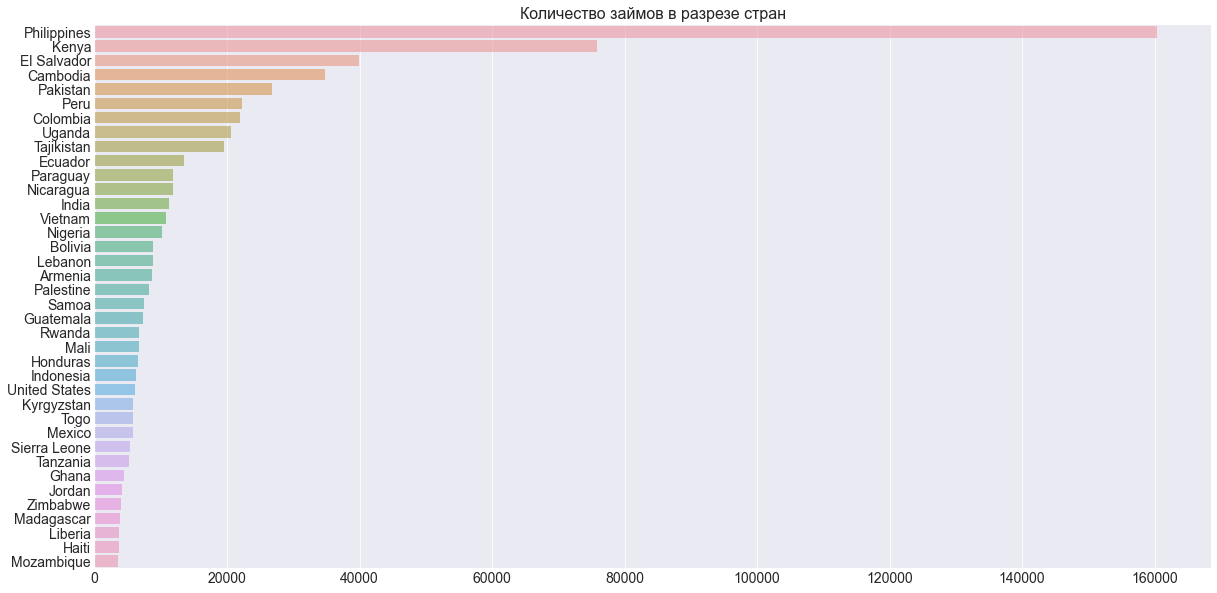

In [58]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе стран', fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов**

Чуть менее четверти всех займов приходится на Филиппины

Возможно потому что там распространены краткосрочные и небольшие займы. Давайте запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия можеть оказаться наиболее эффективной для точечного и обширного финансирования в условиях бдедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Но вообще ни одной из стран Европейского Союза. Удивительно стало присутствие США в этом списке, поскольку уровень бедности у них не такой, как в других странах. 



**2. Попробуем сгруппировать страны по частям света**

In [59]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


**Группируем данные, выбираем столбец MPI, считаем среднее, заполняем пропуски и сбрасываем индексы**

In [60]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

df_mpi_grouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


**Соединяем две таблицы, берем только те значения, которые есть в левой таблице, выбираем столбец-основание, устанавливаем суффиксы для пересечения столбцов, чтобы потом можно было их удалить**

on - Имена столбцов или индексов, к которым нужно присоединиться. Они должны быть найдены в обоих DataFrames. Если on равно None и не выполняется слияние по индексам, то по умолчанию используется пересечение столбцов в обоих DataFrames.

tolist() - конвертирует в лист 

In [61]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country', suffixes=('_x', '_y'))

df_kiva_loans.drop(df_kiva_loans.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_kiva_loans.drop(df_kiva_loans.filter(regex='_x$').columns.tolist(),axis=1, inplace=True)

df_kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,NaN,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


value_counts() - считает количество уникальных значений

In [62]:
regions = df_kiva_loans['world_region'].value_counts()

regions

East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: world_region, dtype: int64

In [63]:
region_list = regions.index.to_list()

region_list

['East Asia and the Pacific',
 'Sub-Saharan Africa',
 'Latin America and Caribbean',
 'Europe and Central Asia',
 'South Asia',
 'Arab States']

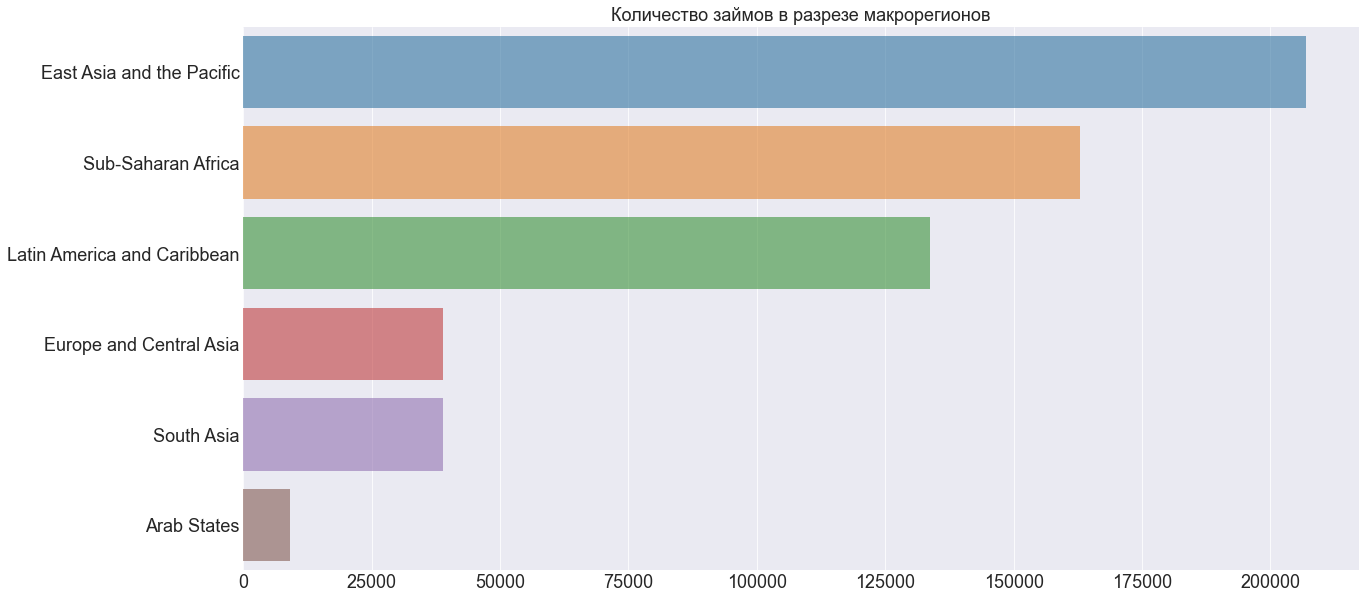

In [64]:
plt.figure(figsize=(20, 10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title('Количество займов в разрезе макрорегионов', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

**Выводы:**

1. Очевидным становится наличие трех лидеров и трех аутсайдеров по количеству выданных займов.
2. Исходя из этого, можно предположить, что в 3 регионах-аутсайдерах либо нет острой необходимости в присутствии Kiva (относительно богатые регионы), либо она пока не набрала те обороты, что мы видим в 3 регионах-лидерах.
3. Присутствие региона Арабские страны свидетельствет в пользу первого предположения. 

##### 2.2 Люди какого пола чаще всего обращаются за финансированием?

In [65]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                426502
male                                                                                                                                                                                                                                                  134710
female, female                                                                                                                                                                                                                                         12164
female, female, female                                                                                                                                                                                                                           

**Вывод:**

Во многих займах заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как "Женщина, женщина, женщина" или "мужчина, мужчина". Это объясняет 12 тыс. полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.



**Давайте использовать метку group для этих заемщиков на круговой диаграмме**

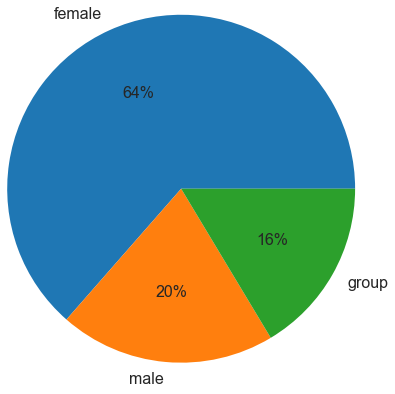

In [66]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female', 'male'] else 
                                     'group' for elem in df_kiva_loans['borrower_genders']]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.1, radius=2)

Выясняется, что большинство заемщиков - женщины, и это весьма неожиданно. 

**Что это может означать?**

Например, что женщины используют Kiva, чтобы получить финансирование и развить собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заемщиков женщины?**

Код ниже: выбираем только те страны, которые есть в countries (страны, которые составляют не менее 0,5% сообщества Kiva), группируем по стране и гендеру, считаем, переводим значения в процениты, делаем из индексов borrower_genders (гендеры) название столбцов и переворачиваем таблицу, заполняем недостающие значения нулями, сортируем и меняем местами столбцы

In [67]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack('borrower_genders') \
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]



df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

df_gender_by_country

borrower_genders,female,male,group
country,,,
Sierra Leone,57.266851,7.959372,34.773777
Indonesia,58.046347,21.097522,20.856131
Colombia,58.458741,38.008638,3.532621
El Salvador,58.771160,39.791850,1.436991
Lebanon,60.748408,27.070064,12.181529
Armenia,62.368208,37.597034,0.034758
Jordan,63.618910,34.557235,1.823854
Kenya,65.570722,19.564787,14.864491
Zimbabwe,66.633614,3.891919,29.474467


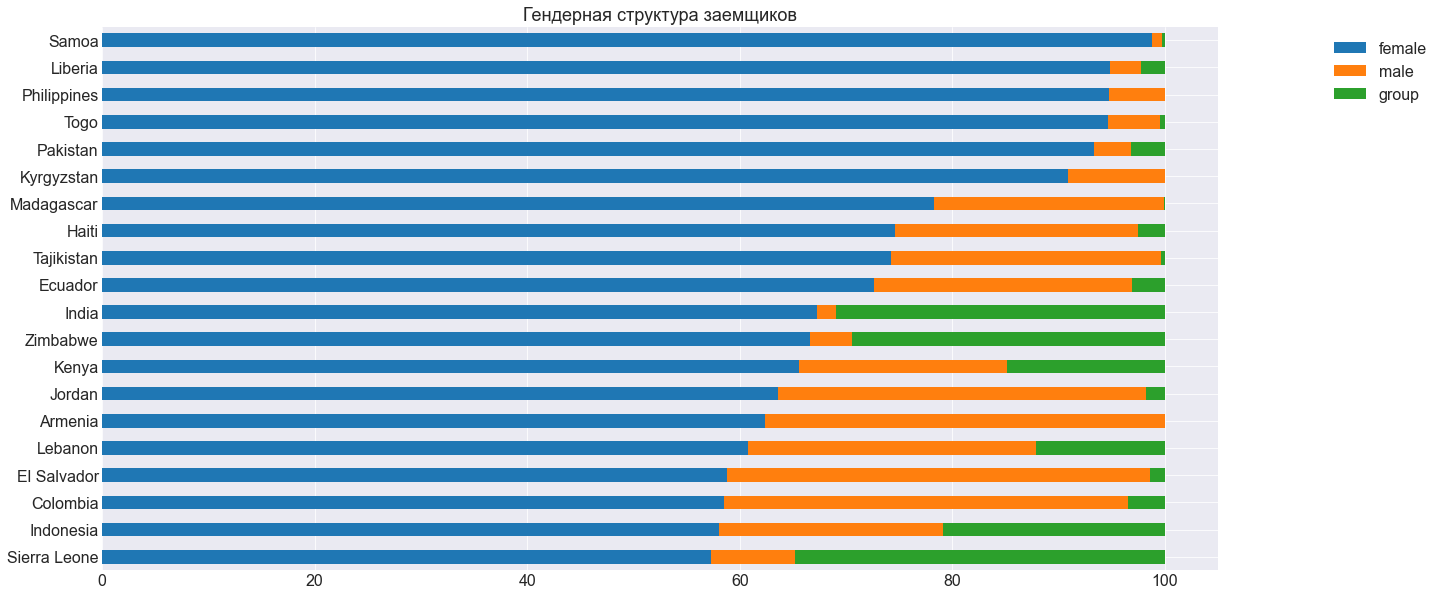

In [68]:
plot = df_gender_by_country.plot.barh(
        figsize=(20, 10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

## 2.3 Количество займов 

Теперь давайте посмотрим, для чего людям нужны кредиты и какие суммы они просят.

### 2.3.1 В разрезе секторов

Начнем с секторов экономики. В сводке, которую мы видели выше, было 15 уникальных секторов. Рассмотрим, как обстоят дела в каждом из них.

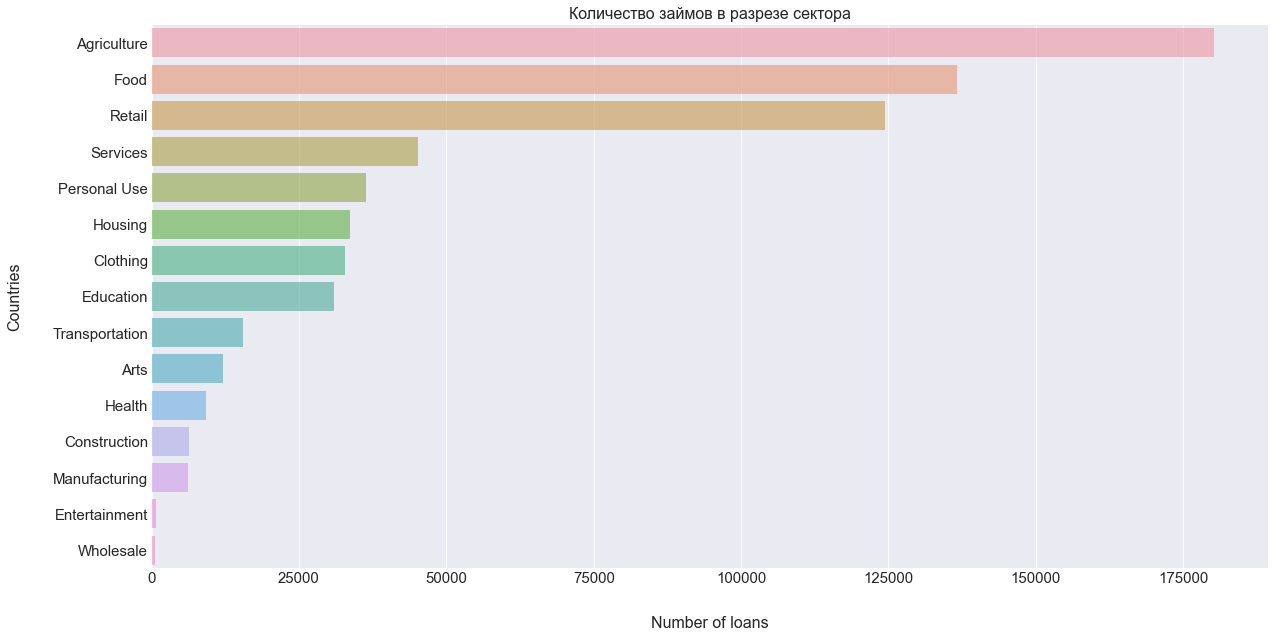

In [69]:
sectors = df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе сектора', fontsize=16)
plt.xlabel('Number of loans', fontsize=16, labelpad=30)
plt.ylabel('Countries', fontsize=16, labelpad=30)
plt.tick_params(labelsize=15)
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)

plt.show()

**Выводы**

Самым доминирующим сектором является сельское хозяйство, за ним следует пищевая промышленность и торговля. Это неудивительно, учитывая список стран, которые интенсивно используют Kiva. Например, беглый осмотр первых страниц сайта свидетельствует о таких примерах: покупка качественных семян и удобрений для использования на ферме и садоводческом хазяйстве, закупка свежей еды, злаков, рыбы, овощей для обеспечения работы предприятия общественного питания. Можно сделать ряд выводов о структуре экономик этих стран, свидетельствующих о том, что это сугубо развивающиеся страны, полагающиеся преимущественно на аграрную отрасль.

Важно отметить, что кредиты на **Личные нужды** также занимают значительную долю. Это означает, что есть люди, которые используют Kiva, потому что они крайне нуждаются.

Гораздо меньше доли занимают Строительство, ПРоизводство, а также сфера Развлечений и Оптовой торговли.

### 2.3.2 В разрезе видов деятельности 

Давайте посмотрим более подробную версию и сделаем подсчет для видов деятельности.

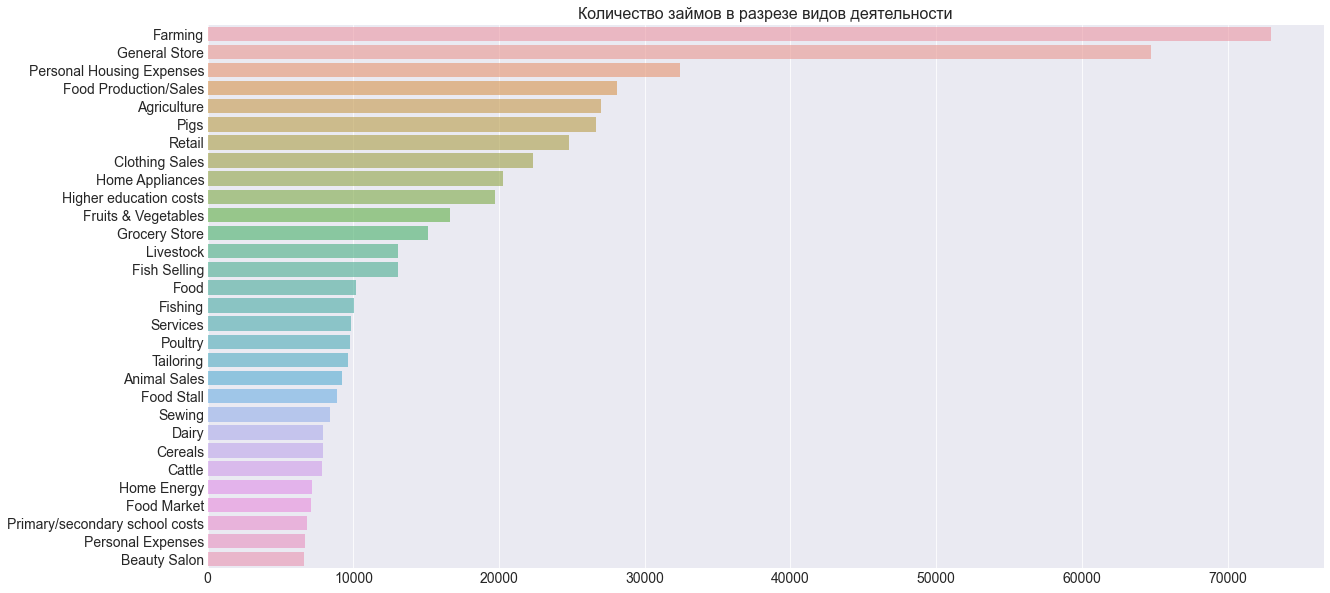

In [70]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе видов деятельности', fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show()


### 2.3.3 Рейтинг целевого назначения займа

In [71]:
activities = df_kiva_loans['use'].value_counts().head(25)

activities.head(25)

to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                    

**Выводы:**

В лидерах по целевому назначению займов вещи, удовлетворяющие базовые человеческие потребности, такие как Покупка фильтров для воды, оборудование септика, светильники на солнечных батареях. 

### 2.3.4 Наиболее популярные виды деятельности

Сравним наиболее популярные направления займов. Для этого сгруппируем займы по признакам sector, activity и посмотримна топ-10 в каждой группе.

In [72]:
loans_by_activity_sectors = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

loans_by_activity_sectors

,sector,activity,loan_amount
0,Agriculture,Agriculture,27023
1,Agriculture,Animal Sales,9237
2,Agriculture,Aquaculture,108
3,Agriculture,Beekeeping,50
4,Agriculture,Cattle,7865
...,...,...,...
124,Services,Water Distribution,564
125,Transportation,Motorcycle Transport,5888
126,Transportation,Rickshaw,2878
127,Transportation,Taxi,2631


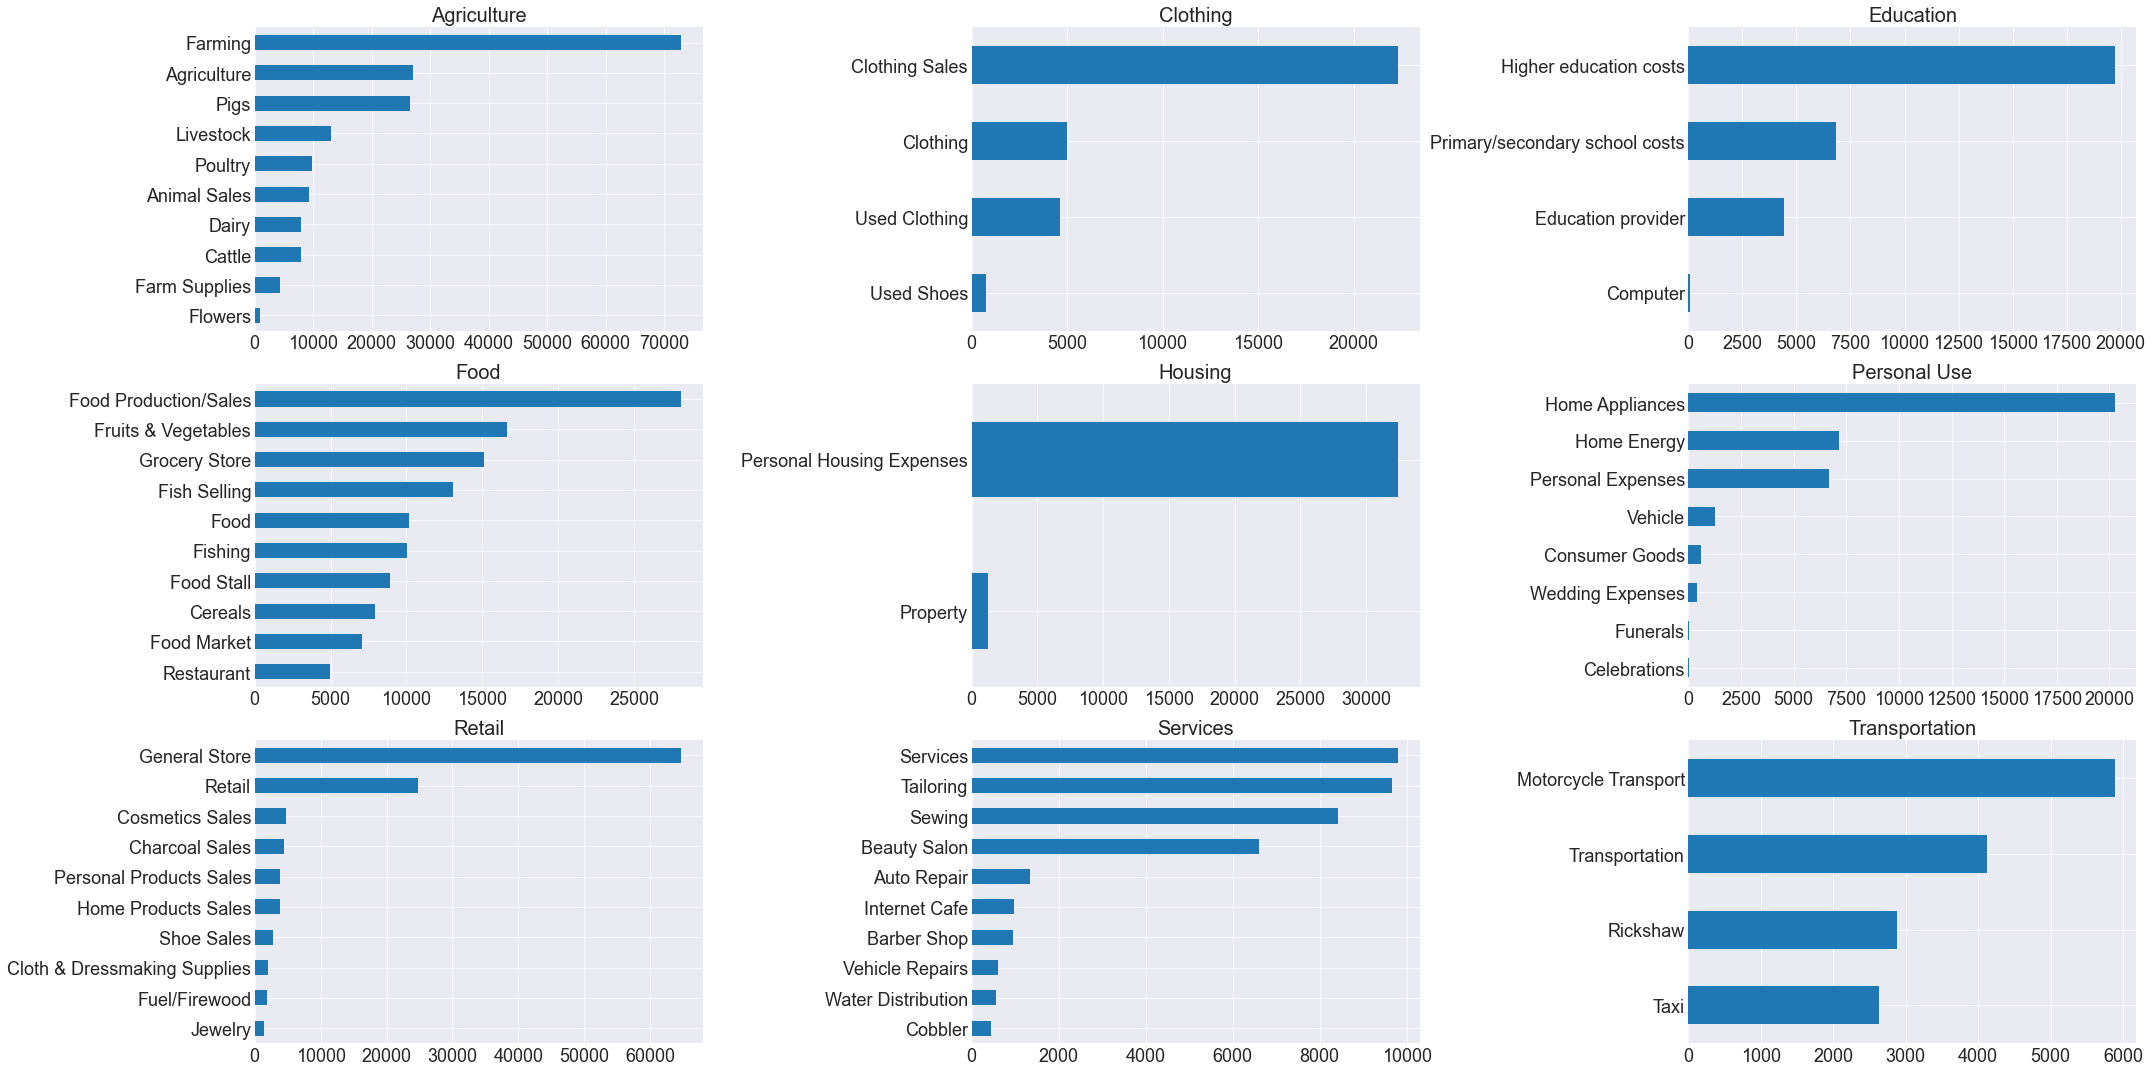

In [73]:
fig,axes = plt.subplots(3, 3, sharex=False, squeeze=False, figsize=(30, 15))

for ax,q in zip(axes.ravel(), loans_by_activity_sectors.sector.unique()):
    tmp_df = loans_by_activity_sectors[loans_by_activity_sectors.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)
    

plt.show()

**Пояснения к коду:**

sharex false - у каждой оси свои подписи (цифры по оси х).

axes - оси

eq() - equal, проверяет, что значения из одного датафрейма равны значению из другого датафрейма

ax.yaxis.label.set_visible() - включает и отключает подпись осей

plt.tight_layout() - автоматически настраивает параметры подзаголовка так, чтобы подзаголовок (и) вписывался в область рисунка. 

zip() - объединяет в кортежи элементы из последовательностей переданных в качестве аргументов.

a = [1,2,3]
b = "xyz"
c = (None, True)
 
res = list(zip(a, b, c))

print (res)
 
[(1, 'x', None), (2, 'y', True)]

**Выводы:**


Львиная доля займов направлена на деятельность с невысокой добавленной стоимостью - Сельское хозяйство, Розничная торговля, Сервис. То есть деятельность, в которой минимально задействованы смежные сектора экономики и невысок потенциал создания дополнительных рабочих мест и продуктов внутри страны, в отличие от, например, Производственных предприятий, Строительства, Ремесленных мастерских, Легкой промышленности. 

И тем не менее, не может не радовать присутствие такого направления как, например, Образование: финансирование обучения в школах и университетах, организация и подготовка курсов и образовательных программ.

## ДЗ. Необходимо выявить страны, в которых преобладают мужчины и группы людей 

### Cтраны, в которых преобладают мужчины

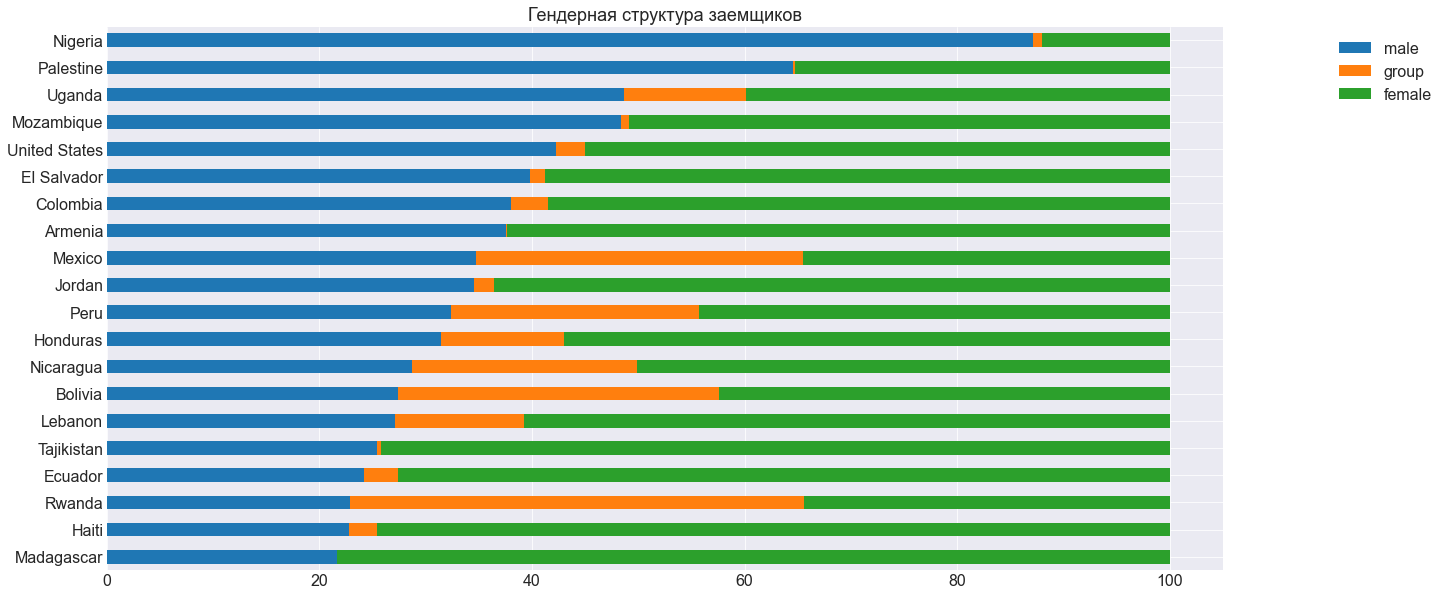

In [74]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack('borrower_genders') \
    .fillna(0)\
    .sort_values(by=['male', 'group', 'female'])[-20:]



df_gender_by_country = df_gender_by_country[['male', 'group', 'female']]


plot = df_gender_by_country.plot.barh(
        figsize=(20, 10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**Выводы:** 

Больше всего среди мужчин сервисом Kiva пользуются в Нигерии. Это возможно связано с партиархальностью нигерийского общества, где у женщин просто нет возможности реализовывать свои права и свободы. Также как и в Палестине. 


### Страны, в которых преобладают мужчины


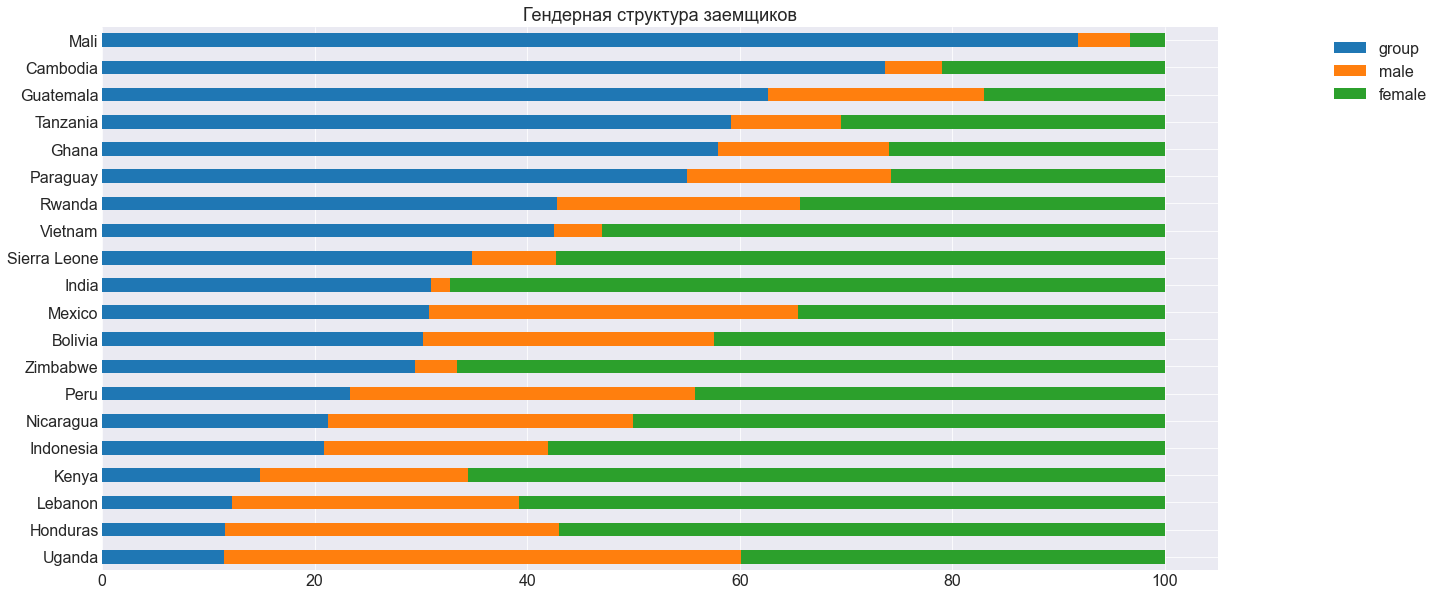

In [75]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack('borrower_genders') \
    .fillna(0)\
    .sort_values(by=['group', 'male', 'female'])[-20:]



df_gender_by_country = df_gender_by_country[['group', 'male', 'female']]


plot = df_gender_by_country.plot.barh(
        figsize=(20, 10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**Выводы:**

4 из топ 5 стран с групповой ответственностью располагаются в Африке

## 2.4 Объем финансирования

### 2.4.1 Распределение суммы займа

Не менее важную информацию могут дать абсолютные значения займов, которые люди в разных сранах запрашивают на реализацию своих целей.

Давайте посмотрим на график распределения суммы займов.

c:\users\яцкийна\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


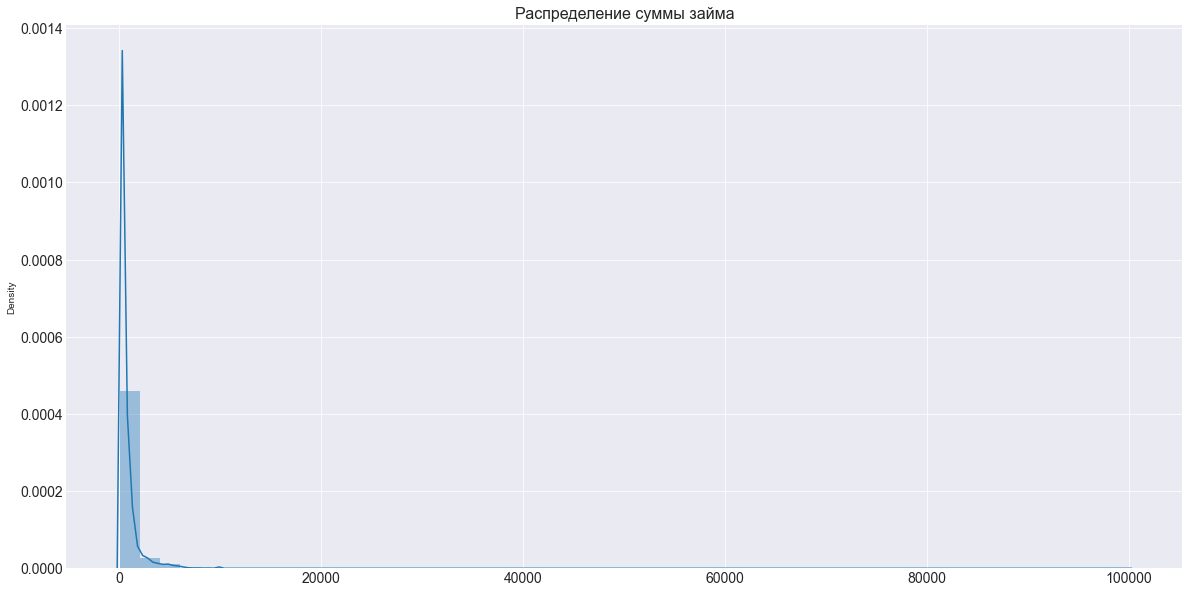

In [76]:
plt.figure(figsize=(20, 10))
plt.title('Распределение суммы займа', fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()


Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень то информативен в этой форме: нам нужно **усечь данные**, исключив выбросы из рассмотрения. Каким образом мы можем это сделать? 

Предлагаю использовать основное, но очень мощное правило: правило трех сигм - 68-95-99.7, это правило гласит, что для нормального распредления 

- 68,27% значений принадлежит [среднее минус 1 сигма, среднее плюс 1 сигма];
- 95,45% значений принадлежит [среднее минус 2 сигмы, среднее плюс 2 сигмы];
- 99,7% значений принадлежит [среднее минус 3 сигмы, среднее плюс 3 сигмы].

Сигма - стандартное отклонение.

Здесь верно, что распределение не обязательно нормальное, но для формы, подобной той, которая у нас есть, мы увидим, что применение третьего фильтра **занчительно улучшит наши результаты.**

![](slide-35.jpg)

c:\users\яцкийна\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


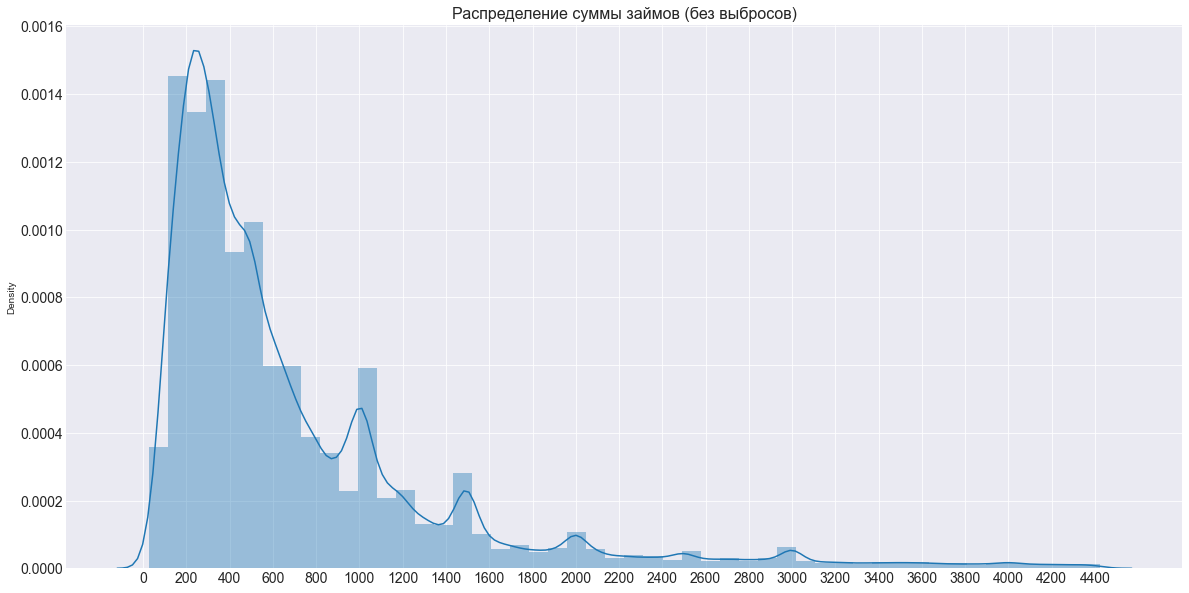

In [77]:
minus_sigma = df_kiva_loans['loan_amount'].mean() - 3 * df_kiva_loans['loan_amount'].std()
plus_sigma = df_kiva_loans['loan_amount'].mean() + 3 * df_kiva_loans['loan_amount'].std()

df_kiva_loans_trimmed = df_kiva_loans.loc[(df_kiva_loans['loan_amount'] < plus_sigma) & 
                                          (df_kiva_loans['loan_amount'] > minus_sigma)]

plt.figure(figsize=(20, 10))
plt.title('Распределение суммы займов (без выбросов)', fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

Теперь явно на много лучше! 

- Большинство ссуд составляют от 100 до 600 долларов;
- Количество суммы естественно уменьшается, но мы можем заметить наличие еще нескольких пиков в 1000 (наиболее четкий) и 2000 долл. США. Можно предположить, что есть опредленный класс проектов, которые являются более "сложными" и финансируются бОльшими суммами.

### 2.4.2 Сумма займа в разрезе секторов

Как насчет больших подробностей? У нас есть информация о сумме кредита в целом, давайте теперь посмотрим разбиение по секторам: 

[Text(0, 0.5, ''), Text(0.5, 0, '')]

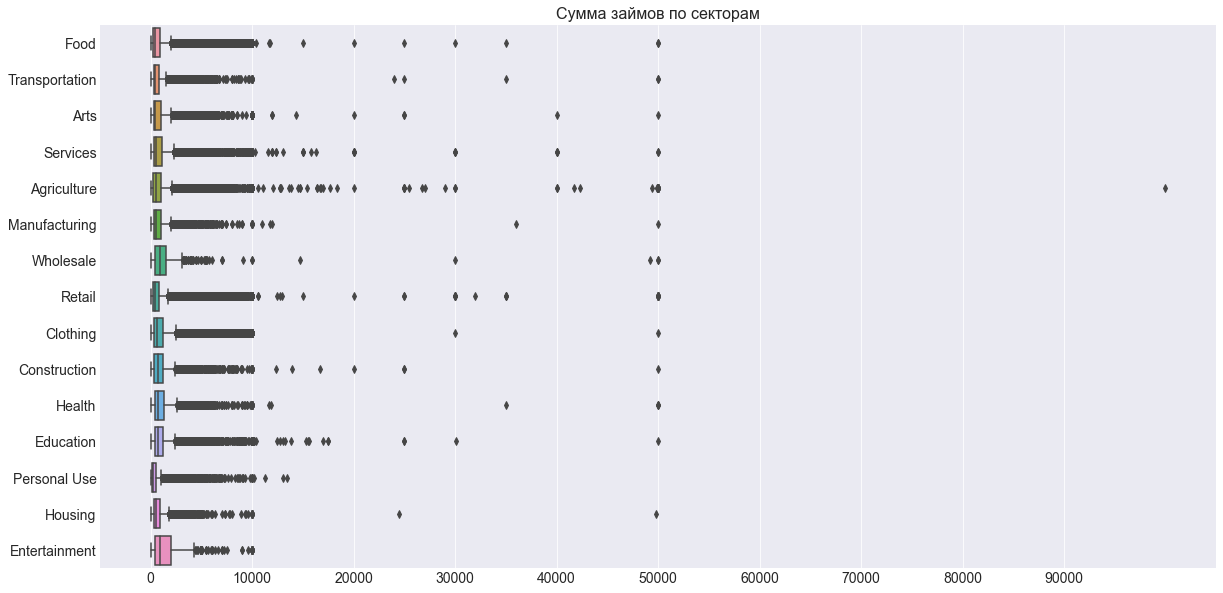

In [78]:
plt.figure(figsize=(20,10))
plt.title('Сумма займов по секторам', fontsize=16)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='sector', data=df_kiva_loans).set(ylabel=None, xlabel=None)

**Выводы:**

Как видите, для любого сектора есть значения-выбросы. И почти для всех секторов, кроме Личные нужды, Индустрия развлечений, наличие займов на суммы в районе $50 000.

Например, кажется, что кто-то запросил кредит на $100 000 для сельскохозяйственного проекта. Есть также много займов на суммы 20к, 50к. 

**Самостоятельная работа:**

Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены, каков гендерный состав заявителей.

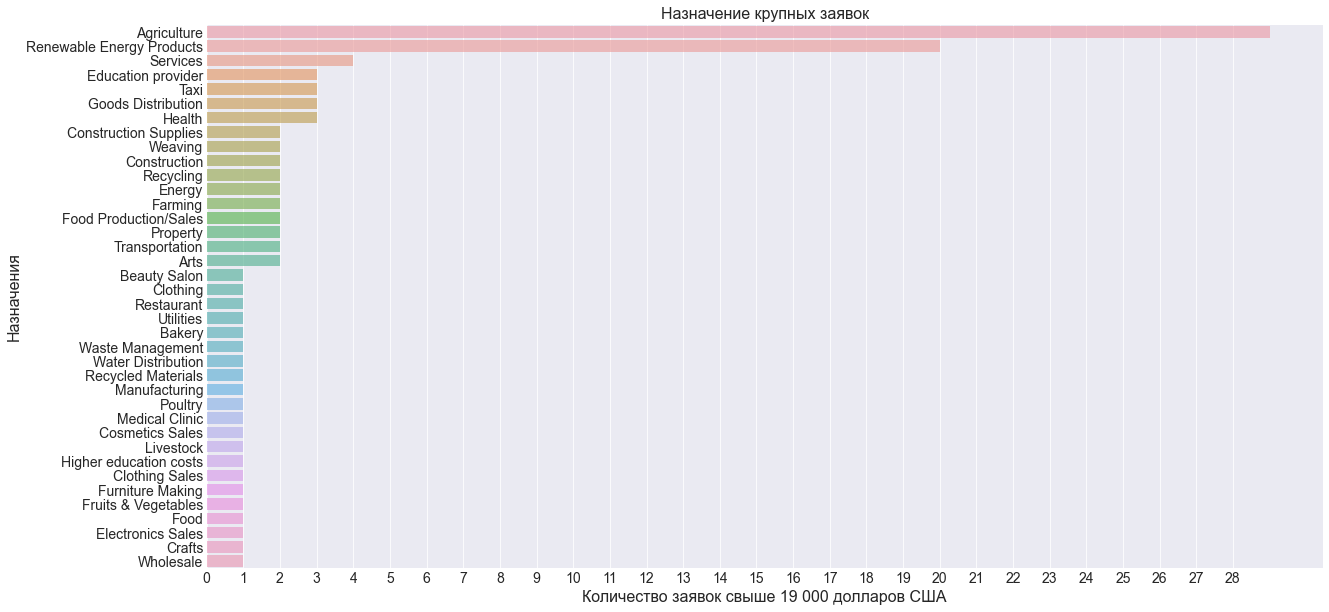

In [79]:
df_kiva_loans_outliers = \
    df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000]\
    .groupby(['activity'])['loan_amount']\
    .count()\
    .sort_values(ascending=False)\
    .reset_index()


plt.figure(figsize=(20, 10))
sns.barplot(x='loan_amount', y='activity', data=df_kiva_loans_outliers, alpha=0.6)
plt.title('Назначение крупных заявок', fontsize=16)
plt.xticks(np.arange(0, max(df_kiva_loans_outliers['loan_amount'])))
plt.tick_params(labelsize=14)
plt.xlabel('Количество заявок свыше 19 000 долларов США', fontsize=16)
plt.ylabel('Назначения', fontsize=16)

plt.show()


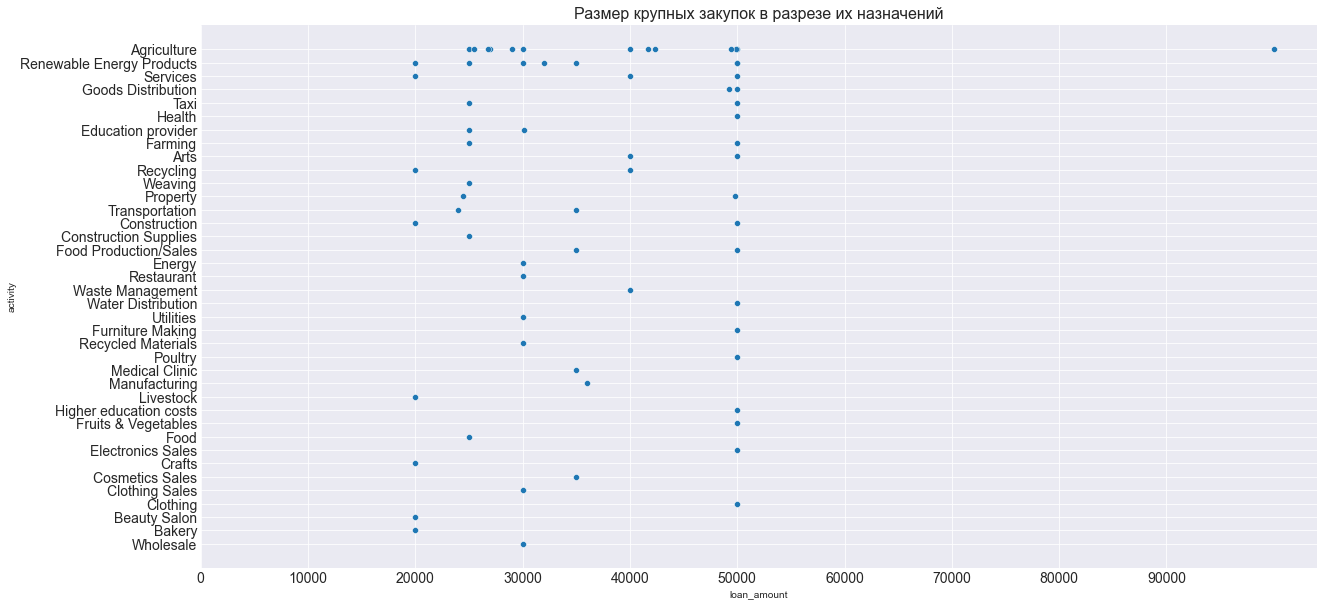

In [80]:
df_kiva_loans_outliers_2 = \
    df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000]\
    .groupby(['activity'])['loan_amount']\
    .count()\
    .sort_values(ascending=False)\
    .reset_index()

df_kiva_loans_grouped = \
    df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000]\
    .groupby(['activity', 'loan_amount'])\
    .count()\
    .reset_index()

df_kiva_loans_outliers_2.rename(columns={'loan_amount':'sum'},inplace=True)


new_df_kiva_loans_grouped = \
    df_kiva_loans_grouped\
    .merge(df_kiva_loans_outliers_2)\
    .sort_values('sum', ascending=False)


plt.figure(figsize=(20, 10))

sns.scatterplot(x='loan_amount', y='activity', data=new_df_kiva_loans_grouped)

plt.title('Размер крупных закупок в разрезе их назначений', fontsize=16)
plt.xticks(np.arange(0, max(df_kiva_loans_grouped['loan_amount']), 10000))
plt.tick_params(labelsize=14)

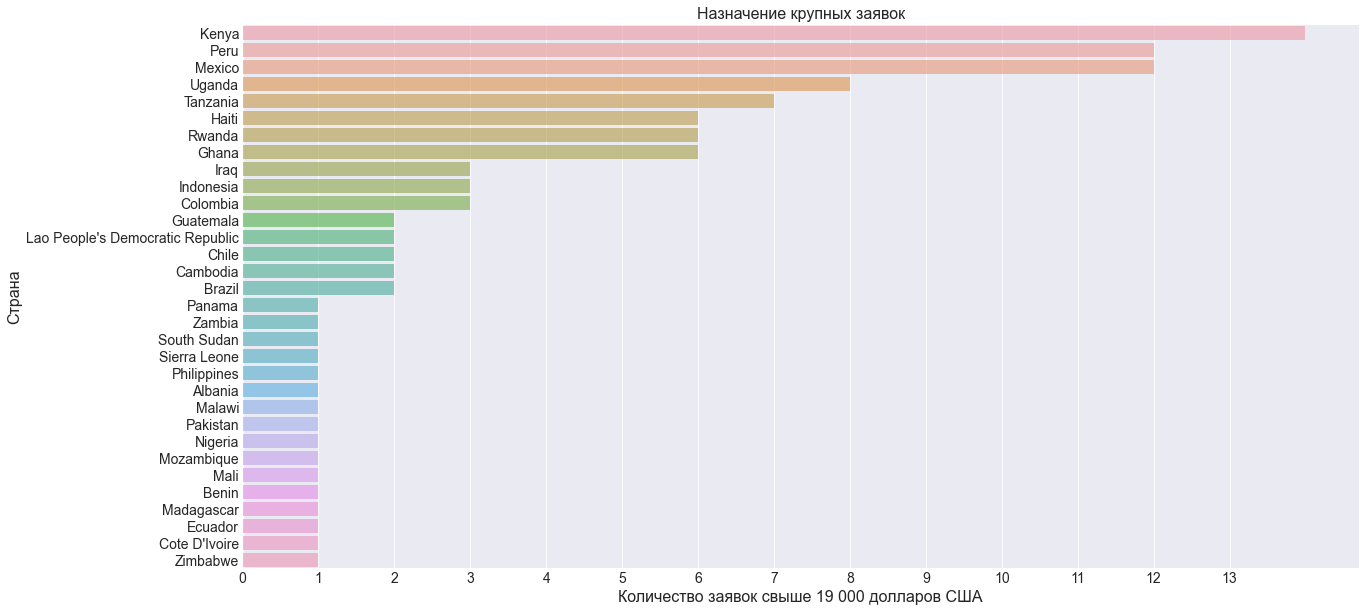

In [81]:
df_kiva_loans_outliers_3 = \
    df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000]\
    .groupby(['country'])['loan_amount']\
    .count()\
    .sort_values(ascending=False)\
    .reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x='loan_amount', y='country', data=df_kiva_loans_outliers_3, alpha=0.6)
plt.title('Назначение крупных заявок', fontsize=16)
plt.xticks(np.arange(0, max(df_kiva_loans_outliers_3['loan_amount'])))
plt.tick_params(labelsize=14)
plt.xlabel('Количество заявок свыше 19 000 долларов США', fontsize=16)
plt.ylabel('Страна', fontsize=16)

plt.show()

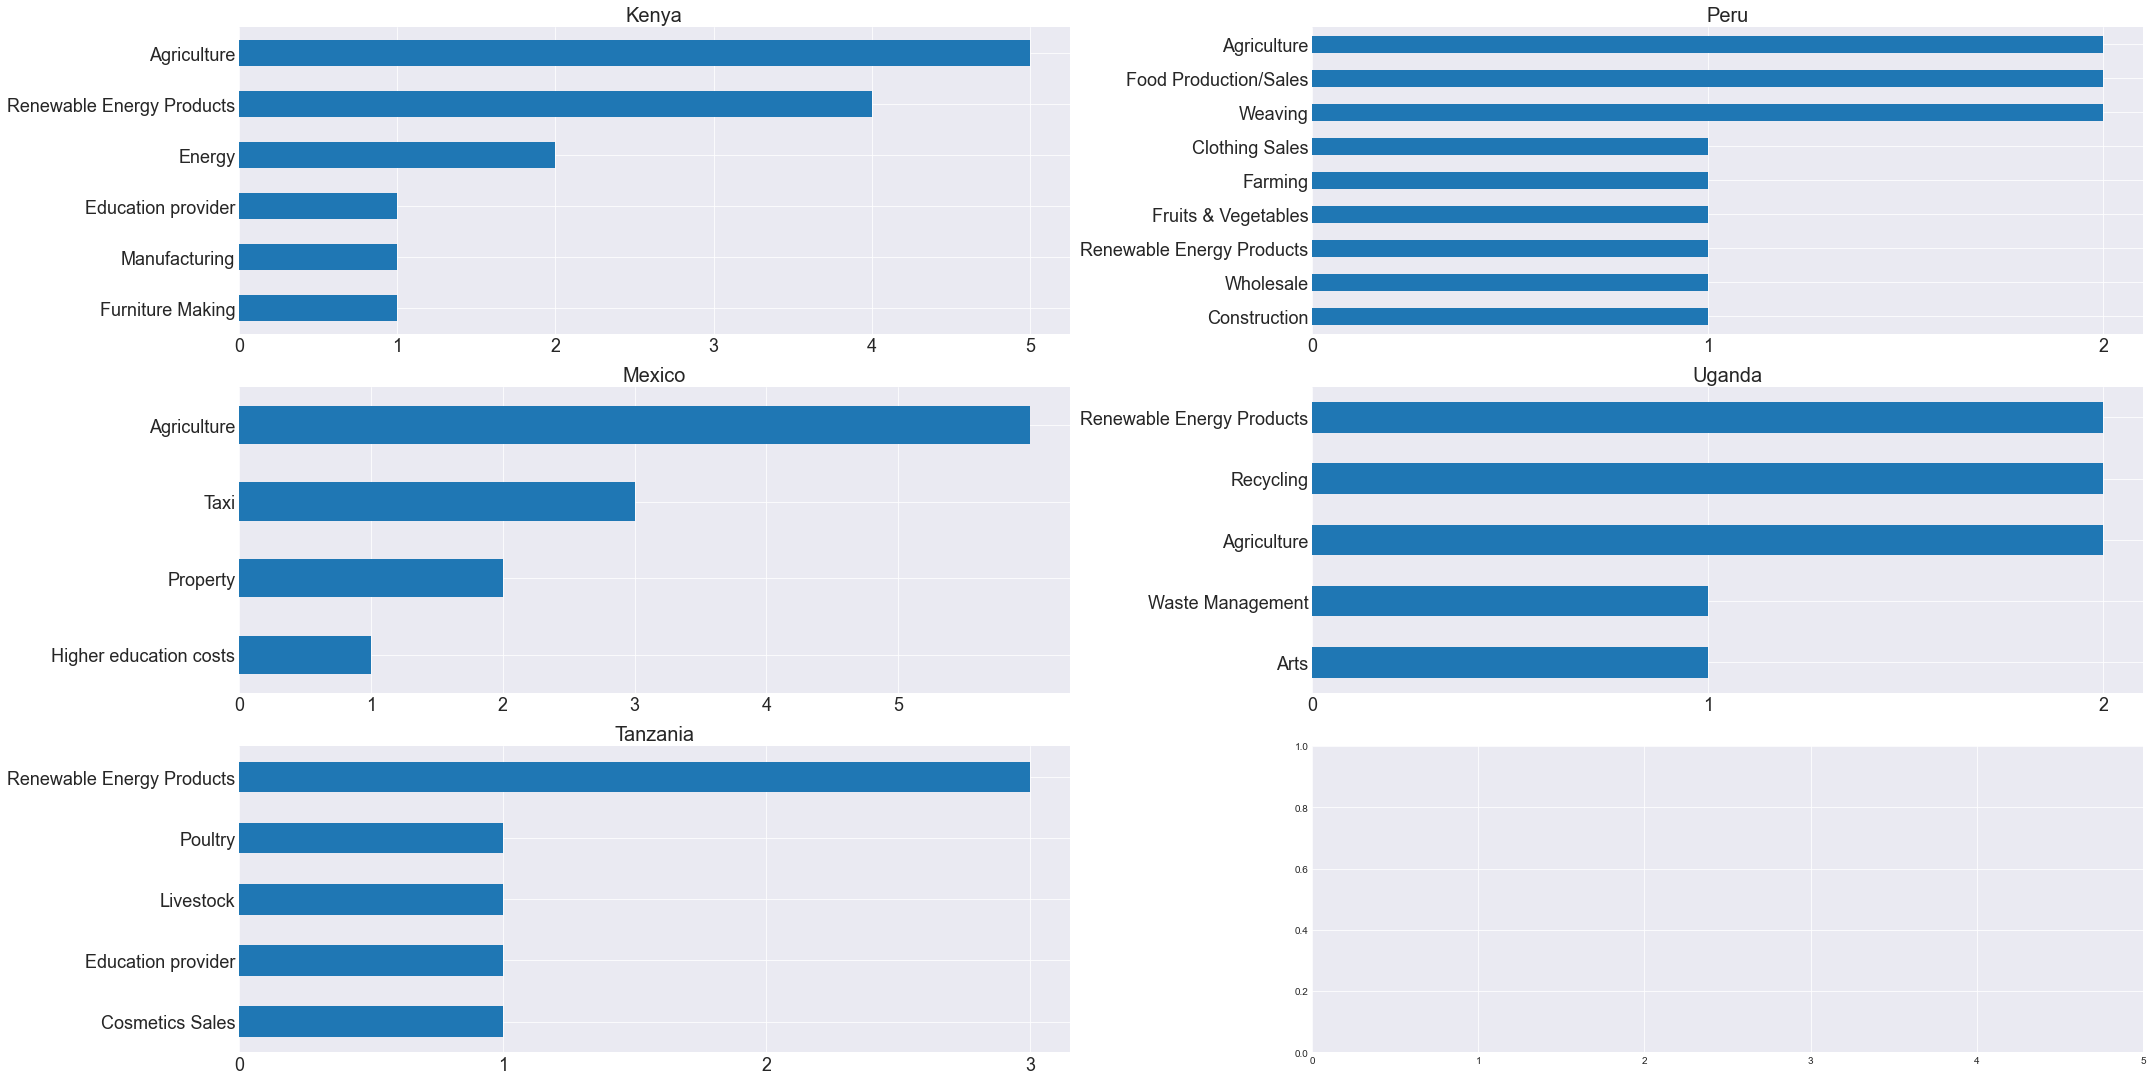

In [82]:
df_kiva_loans_outliers_top_5_countries = \
    df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000]\
    .groupby(['country'])['loan_amount']\
    .count()\
    .sort_values(ascending=False)[:5]

df_kiva_loans_outliers_top_5_countries

df_kiva_loans_outliers_top_5_countries_with_activities = \
    df_kiva_loans[(df_kiva_loans['country'].isin(df_kiva_loans_outliers_top_5_countries.index.values)) & 
                  (df_kiva_loans['loan_amount'] > 19000)]\
    .groupby(['country', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

df_kiva_loans_outliers_3 = \
    df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000]\
    .groupby(['country'])['loan_amount']\
    .count()\
    .sort_values(ascending=False)\
    .reset_index()\

df_kiva_loans_outliers_3.rename(columns={'loan_amount':'sum'}, inplace=True)


new_df_kiva_loans_outliers_top_5_countries_with_activities = \
    df_kiva_loans_outliers_top_5_countries_with_activities\
    .merge(df_kiva_loans_outliers_3).sort_values(by='sum', ascending=False)



# from  matplotlib.ticker import FuncFormatter

fig,axes = plt.subplots(3, 2, sharex=False, squeeze=True, figsize=(30, 15))
plt.xticks(np.arange(0, 6, 1))



for ax,q in zip(axes.ravel(), 
                new_df_kiva_loans_outliers_top_5_countries_with_activities.country.unique()):
    tmp_df = new_df_kiva_loans_outliers_top_5_countries_with_activities[
        new_df_kiva_loans_outliers_top_5_countries_with_activities.country.eq(q)]\
                .drop(columns=['sum'])\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
#     ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x))) #переводит ticks из float в int
    ax.set_xticks(np.arange(0, 6, 1))

    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)


plt.show()


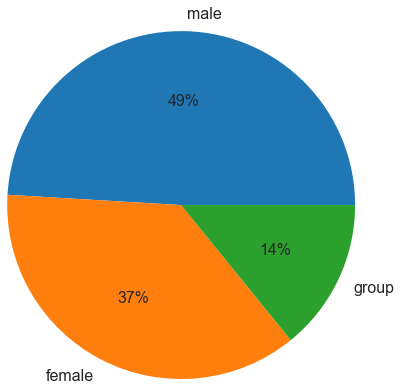

In [83]:
df_kiva_loans_outliers_genders = df_kiva_loans.loc[df_kiva_loans['loan_amount'] > 19000].copy() # copy чтобы не возникало ошибки, что я работаю на копии среза данных.



df_kiva_loans_outliers_genders['borrower_genders'] = [elem if elem in ['female', 'male'] else 
                                     'group' for elem in df_kiva_loans_outliers_genders['borrower_genders']]

borrowers = df_kiva_loans_outliers_genders['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.1, radius=2)



**Выводы по домашнему заданию:**

1. Наибольшее количество крупных заявок в сельском хозяйстве и источниках возобновляемой энергии.
2. В целом много заявок на уровне 50 к. 
3. Среди стран крупных заявок больше всего в Кении, Перу, Мексике, Уганде и Танзании. При этом среди этих стран наибольшее разнообразие в Перу. В Кении, Перу и Мексике преобладают крупные заявки в сельское хозяйство. 
4. Около половины крупных заявок подают мужчины.

##### Давайте взглянем на средние и медиальный значения суммы займа по секторам:


In [84]:
sector_mean_median = df_kiva_loans\
    .groupby(['sector']) ['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


**Выводы:**
Среднее значение превышает медианное порой в несколько раз

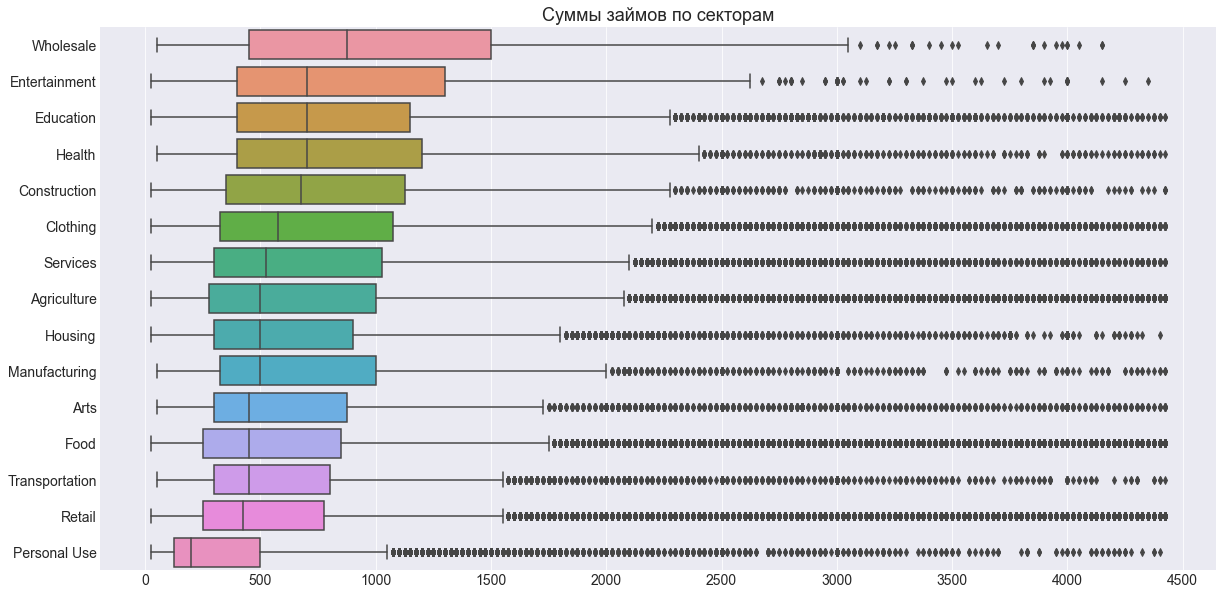

In [85]:
plt.figure(figsize=(20,10))
plt.title('Суммы займов по секторам', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='sector', order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

**Комментарий к коду:**
order= - выстраивает график в заданном порядке. Ранее мы отсортировали значения, и индексы выгрузили в лист sort_order. В соответствии с этим листом и выстроились значения на графике.

**Выводы:**

Прежде всего нужно отметить, что именно медиана дает робастную (устойчивую к выбросам) оценку центрального положения суммы займа.

Из графика становится ясно, что медиана суммы заявок на **Личные нужны** обладает наименьшим значением. Личные нужды включают предметы обихода и первой необходимости, обеспечение жилища энергией, теплом и водой. Именно эта группа заявок может свидетельствовать о случаях крайней нужды и бедности в различных странах.

На другой стороне графика сектора с самыми большими показателями медианы суммы займа: **Оптовая торговля**, требующая значительных затрат на закупку, что вполне логично; **Образование и Здравоохранение**, а также **Сфера развлечений**.

### 2.4.3 Распределение по макрорегионам


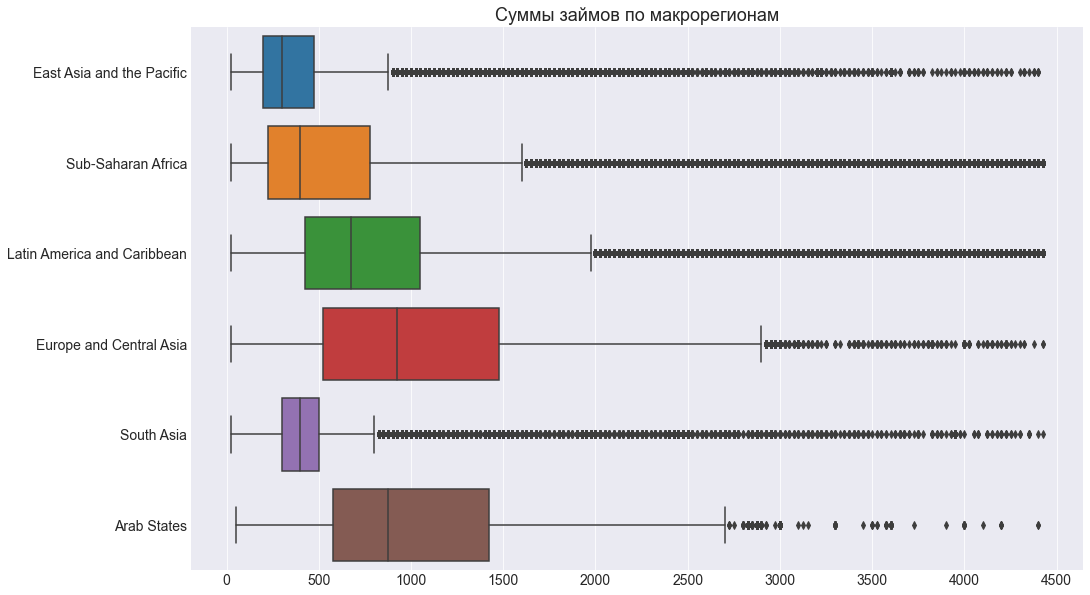

In [86]:
plt.figure(figsize=(16, 10))
plt.title('Суммы займов по макрорегионам', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='world_region', order=region_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)

plt.show()

**Выводы:**
Регионы расположены в порядке убывания количества займов (в соответствии с графиком, полученным в п. 2.2.1).

Скорее всего, те регионы, в которых медиальные значения ниже, в целом беднее и требуют финансирования короткими, небольшими, но частыми займами. Эту ситуацию мы наблюдаем в регионе **Юго-Восточная Азия**, лидероми в котором являются Филиппины и Камбоджа.

Однако, на этом графике мы можем заметить регион, который выбивается из последовательности: **Южная Азия** и, в частности, такие страны как **Пакистан** и **Индия**. Вполне вероятно, что в этом регионе есть отличная площадка для расширения присутствия и поддержки со стороны сообщества Kiva.

**Вопросы для самостоятельной работы:**

Попробуйте найти связь между странами (регионами), полом заемщика и суммой заявки. Какие выводы можно сделать из этих данных?

In [87]:
df_kiva_loans_trimmed.groupby('world_region')['loan_amount'].agg('describe').sort_values(by='50%', ascending=False)
# Это я просто так вывел, для наглядности

,count,mean,std,min,25%,50%,75%,max
world_region,,,,,,,,
Europe and Central Asia,38783.0,1082.057216,711.482479,25.0,525.0,925.0,1475.0,4425.0
Arab States,9106.0,1084.968702,721.689413,50.0,575.0,875.0,1425.0,4400.0
Latin America and Caribbean,130575.0,855.531687,669.619466,25.0,425.0,675.0,1050.0,4425.0
South Asia,38766.0,516.716968,477.315318,25.0,300.0,400.0,500.0,4425.0
Sub-Saharan Africa,160614.0,615.925916,659.509800,25.0,225.0,400.0,775.0,4425.0
East Asia and the Pacific,206847.0,412.555053,364.334654,25.0,200.0,300.0,475.0,4400.0


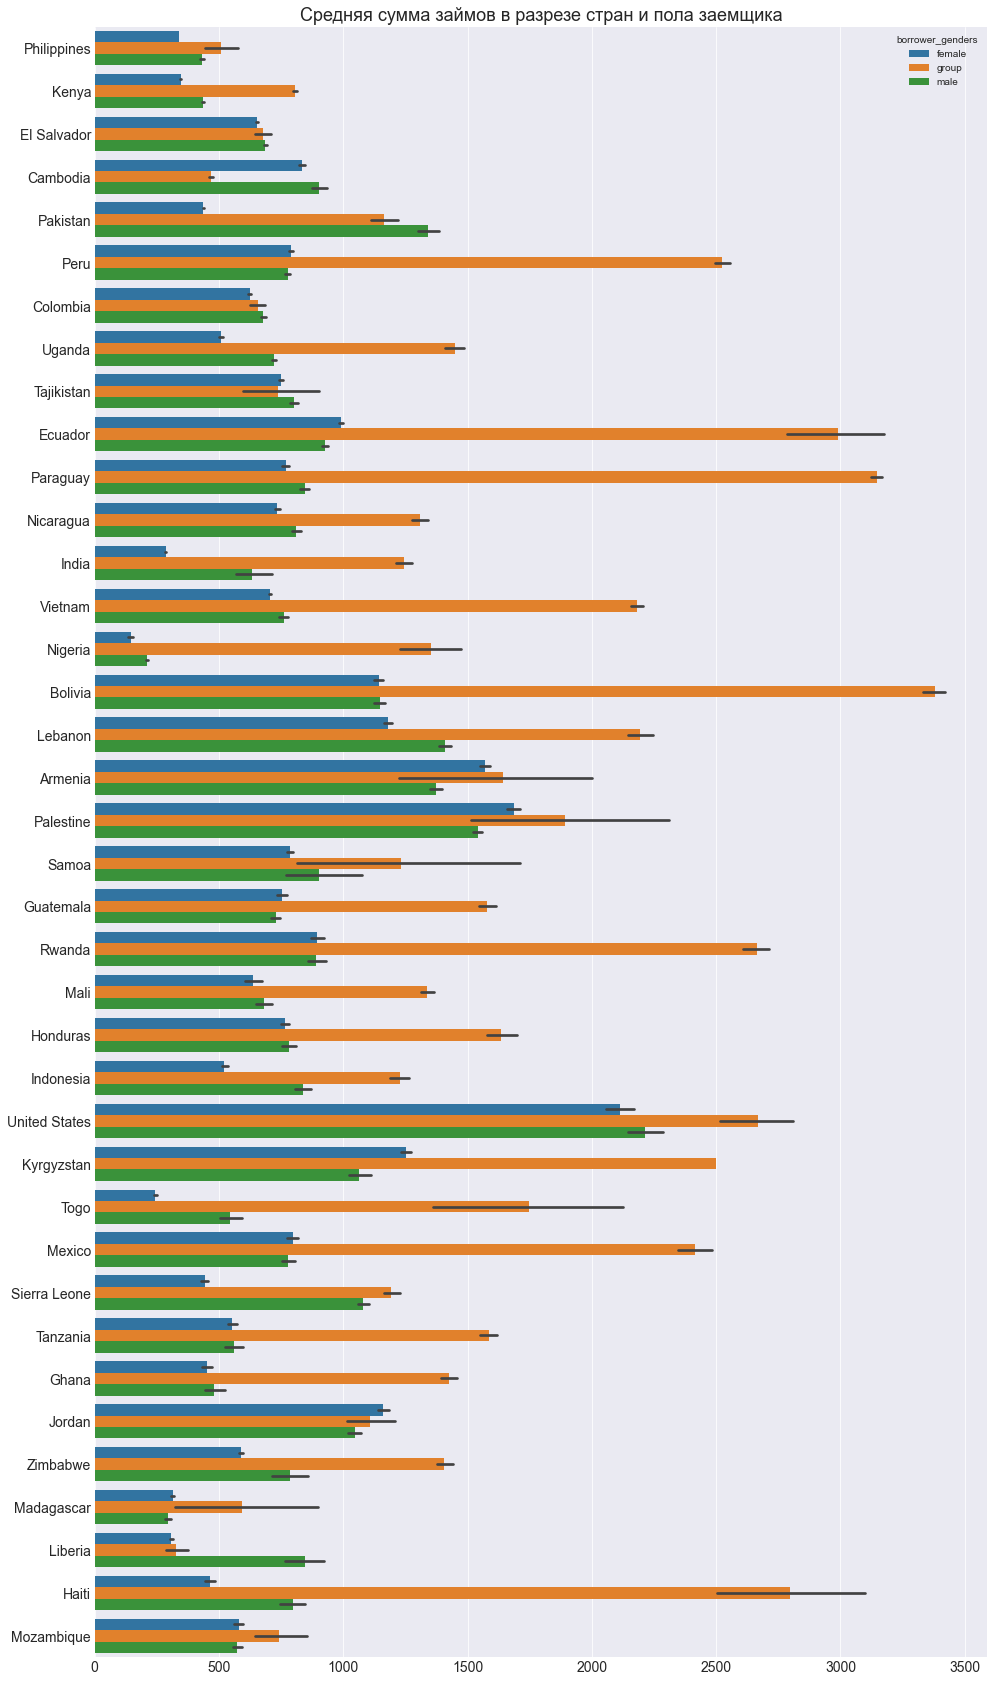

In [88]:
plt.figure(figsize=(16, 30))
plt.title('Средняя сумма займов в разрезе стран и пола заемщика', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)


sns.barplot(x='loan_amount', y='country', order=list_countries, hue='borrower_genders', data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)

plt.show()

**Выводы:**
1. Мы взяли топ стран с наибольшим количеством заявок и посчитали среднюю сумму заявок в разрезе пола заемщиков.
2. Почти во всех странах наибольшее среднее у групп заещиков, что очевидно, так как заемщики могут разделить ответственность.
3. Среди не групп среднее выше у мужчин.
4. Есть так же страны, где среднее выше у женщин, например, Камбоджа, Аремения, Палестина. При этом в Палестине женщины берут реже заямы, но суммы таких займов больше, чем у мужчин.

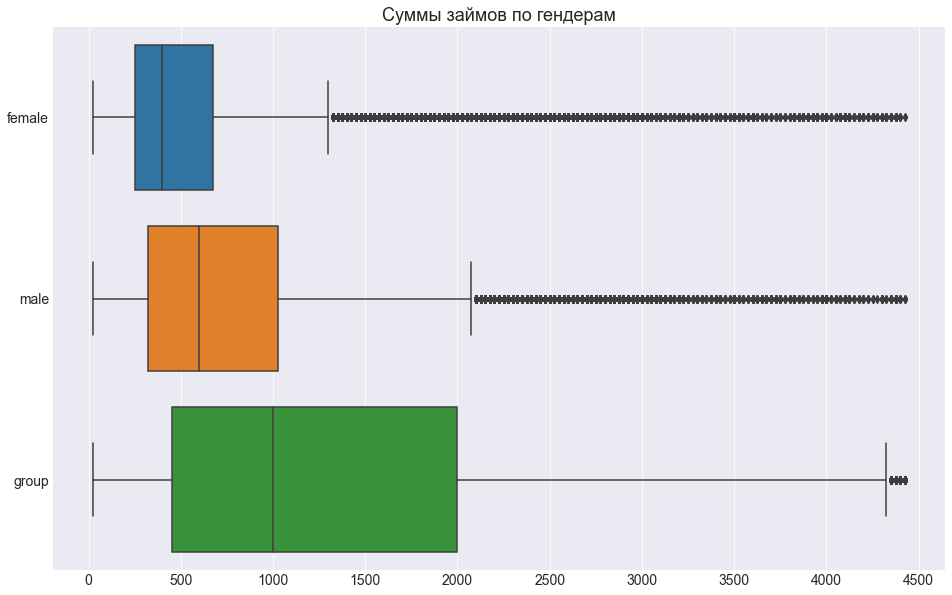

In [89]:
plt.figure(figsize=(16, 10))
plt.title('Суммы займов по гендерам', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='borrower_genders', order=['female', 'male', 'group'], data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)

plt.show()

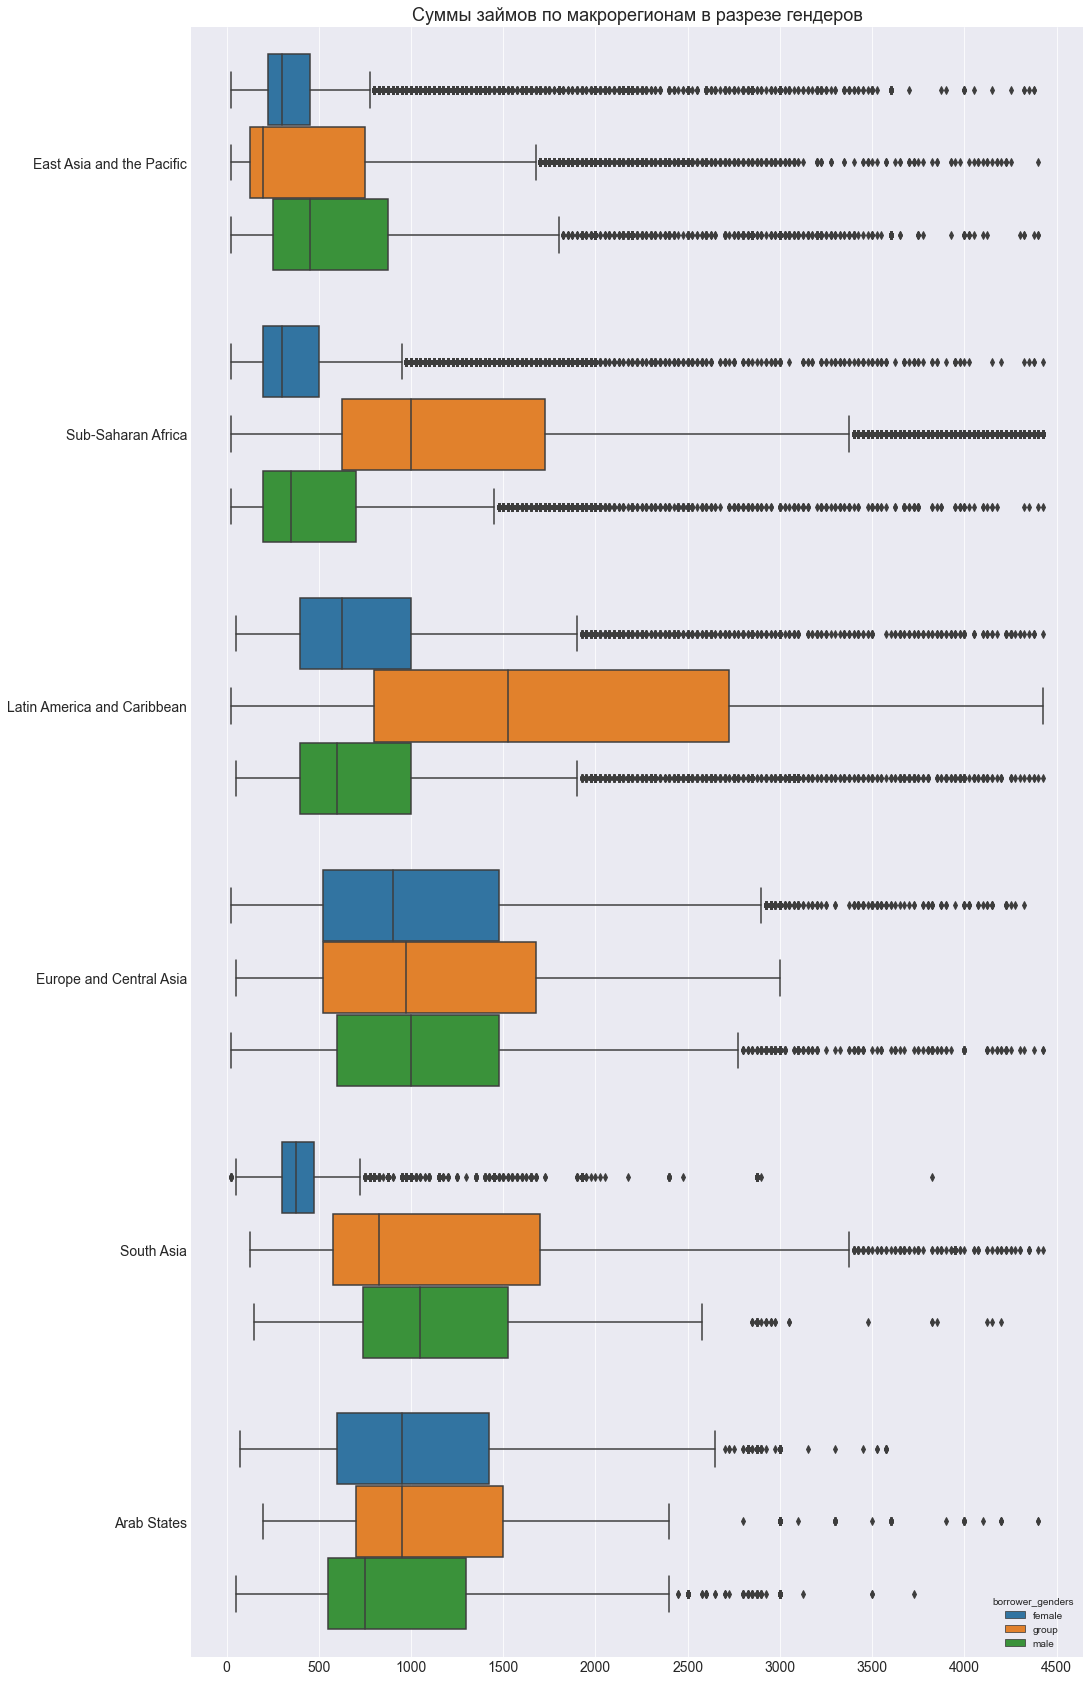

In [90]:
plt.figure(figsize=(16, 30))
plt.title('Суммы займов по макрорегионам в разрезе гендеров', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='world_region', hue='borrower_genders', order=region_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)

plt.show()

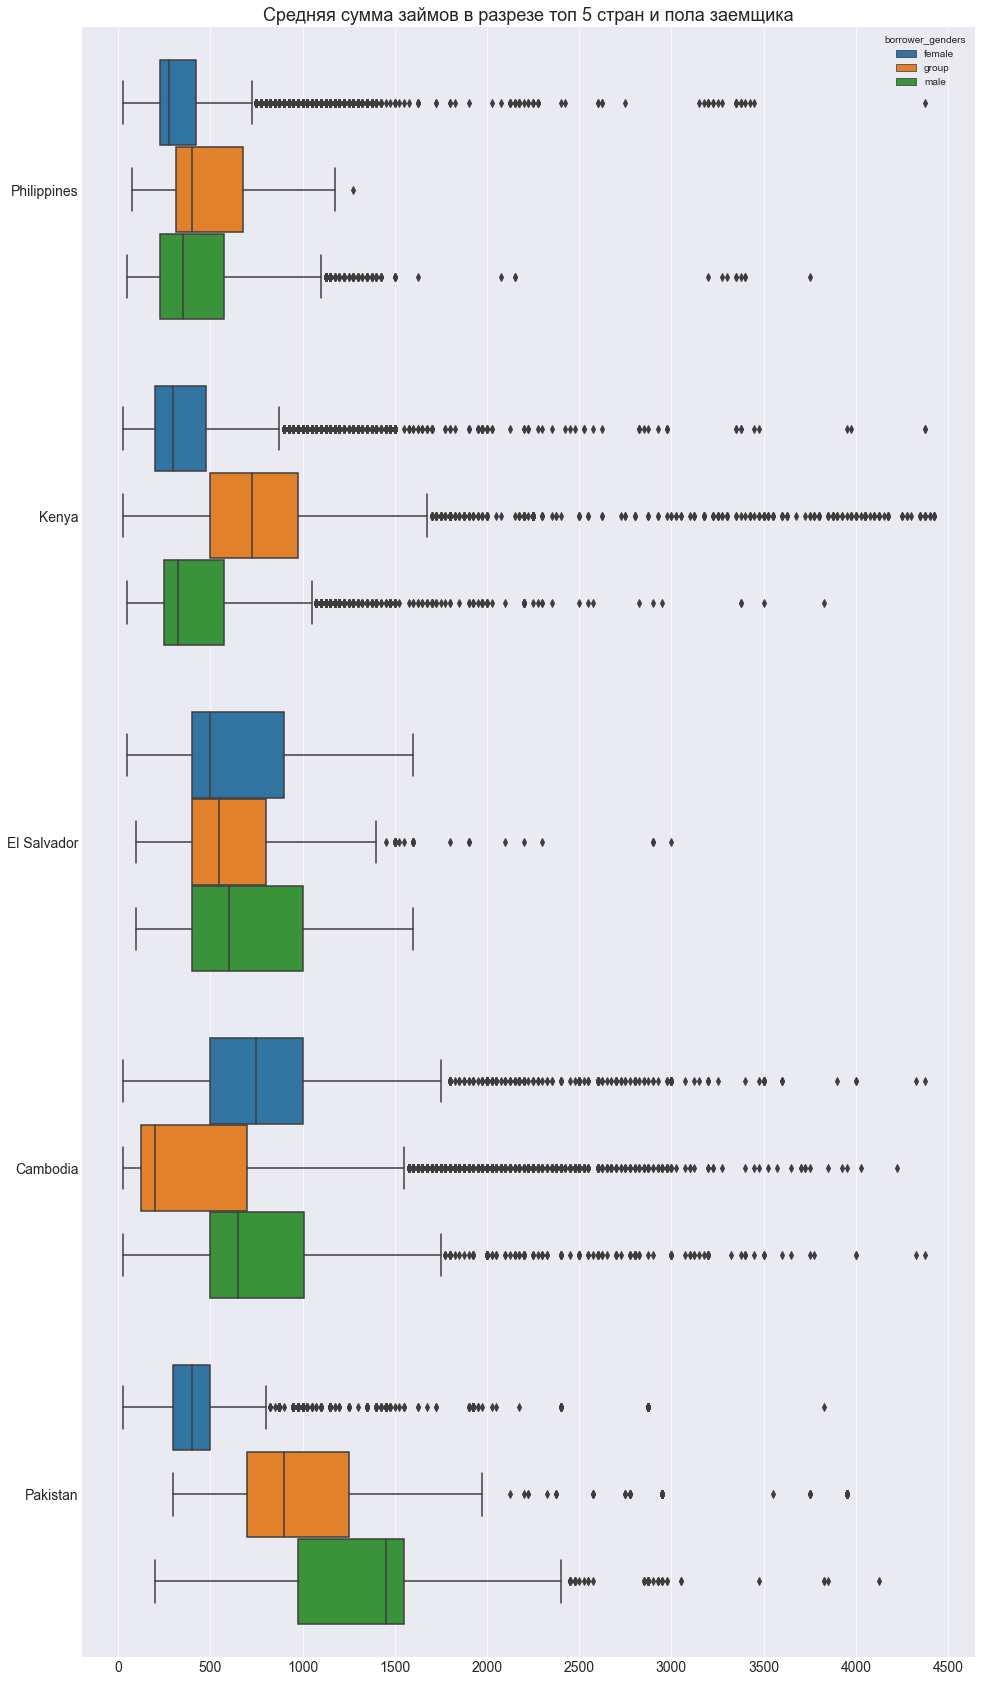

In [91]:
plt.figure(figsize=(16, 30))
plt.title('Средняя сумма займов в разрезе топ 5 стран и пола заемщика', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)


sns.boxplot(x='loan_amount', y='country', order=list_countries[:5], hue='borrower_genders', data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)

plt.show()

## 2.5. Время ожидания средств

Итак, мы увидели, где Kiva наиболее популярна, тип деятельности и заемщиков, которые нуждаются в деньгах, а также сколько денег они обычно просят. Отлично!

Следующий интересный вопрос, который мы можем задать: как долго им действительно приходится ждать финансирование? К счастью, у нас есть две колонки, которые помогут нам в нашем исследовании: 

- posted_time: соответствует дате + точный час, когда заявка  появиласть на сайте.
- disbursed_time: соответствует дате + точный час, когда деньги фактически были получены адресатом.

1. Отбрасываем строки с пропущенными значениями для "disbursed_time", получаем столбцы в правильном формате. 
2. Вычислим интервал между датами
3. Исключим из рассмотрения заявки, для которых деньги сначала фактически выделяются агентами на местах и только потом публикуются на сайте. 

In [92]:
#drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

#dates columns:
dates = ['posted_time', 'disbursed_time']

df_loans_dates = df_loans_dates.copy()

#format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0]) 
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

#calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1)

#remove outliers +- sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs() #дисперсия
std = df_loans_dates['time_funding'].std()

#keep rows where time_funding intervals > 0 only. Правило трех сигм.
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

**Поясления к коду:**

1. subset - по каким столбцам откинуть зачения NA
2. how - как именно убрать нулевые зачения 

how - Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.

‘any’ : If any NA values are present, drop that row or column.

‘all’ : If all values are NA, drop that row or column.

3. Различия map, apply и applymap ниже. Здесь применяем applymap в первом случае, потому что нам нужно поэлементно провести операции и нет острой необходимости использовать apply, во втором случае применяем apply так как производим опеции со всем столбцом. 

**First major difference: DEFINITION**

- map is defined on Series ONLY
- applymap is defined on DataFrames ONLY
- apply is defined on BOTH

**Second major difference: INPUT ARGUMENT**

- map accepts dicts, Series, or callable
- applymap and apply accept callables only

**Third major difference: BEHAVIOR**

- map is elementwise for Series
- applymap is elementwise for DataFrames
- apply also works elementwise but is suited to more complex operations and aggregation. The behaviour and return value depends on the function.

**Fourth major difference (the most important one): USE CASE**

- map is meant for mapping values from one domain to another, so is optimised for performance (e.g., df['A'].map({1:'a', 2:'b', 3:'c'}))
- applymap is good for elementwise transformations across multiple rows/columns (e.g., df[['A', 'B', 'C']].applymap(str.strip))
- apply is for applying any function that cannot be vectorised (e.g., df['sentences'].apply(nltk.sent_tokenize))

4. timedelta(days=1) - класс timedelta() модуля datetime представляет собой продолжительность, разницу между двумя датами или временем.

f = t2 / t3 - деление общей длительности 't2' на интервал 't3'. Возвращает объект 'float'.

**~(dev>3*std)** - выбирает те значения, которые меньше трех стандартных отклонений в соответствии с правилом трех сигм.

И далее выбираем значения больше нуля, чтобы не попались отрицательные значения, так как может быть, что деньги региональный менеджер выдает раньше, чем размещает информацию на сайте


### 2.5.1 Количество дней до полного финансирования заявки
__________________________________________________________________________

Отлично, мы получилирачетную величену. Теперь построим график распределения количества дней до полного финансирования заявки.

c:\users\яцкийна\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


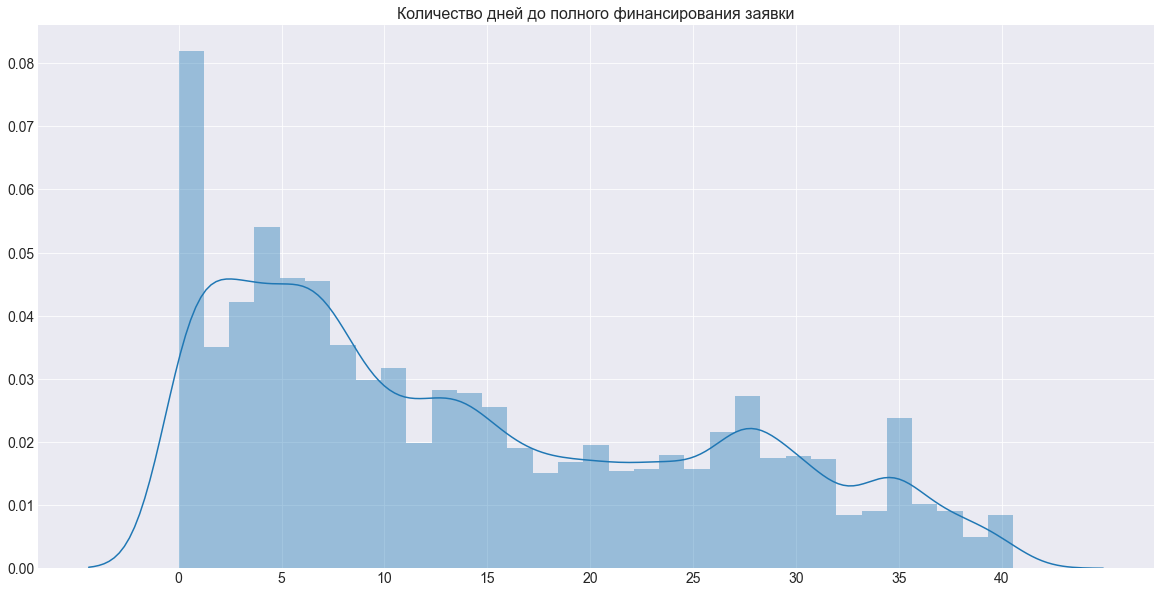

In [93]:
plt.figure(figsize=(20, 10))
plt.title('Количество дней до полного финансирования заявки', fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

**Выводы:**
бОльшая часть заявок финансируется в течение 10 дней.

Однако также очевидно и наличие пиков в районе 27, 35 дней. Это уже может свидетельствовать о том, что часть заявок проходит довольно длительный процесс финансирования. Чем это можно объяснить? бОльшими суммами? Чтобы это проверить, давайте попробуем найти зависимость между суммой займа и временным интервалом финансирования.

### 2.5.2 Время ожидания суммы займов
_____________________________________________

Для визуализации этой зависимости и временного интервала финансирования давайте построим **тепловую карту**:

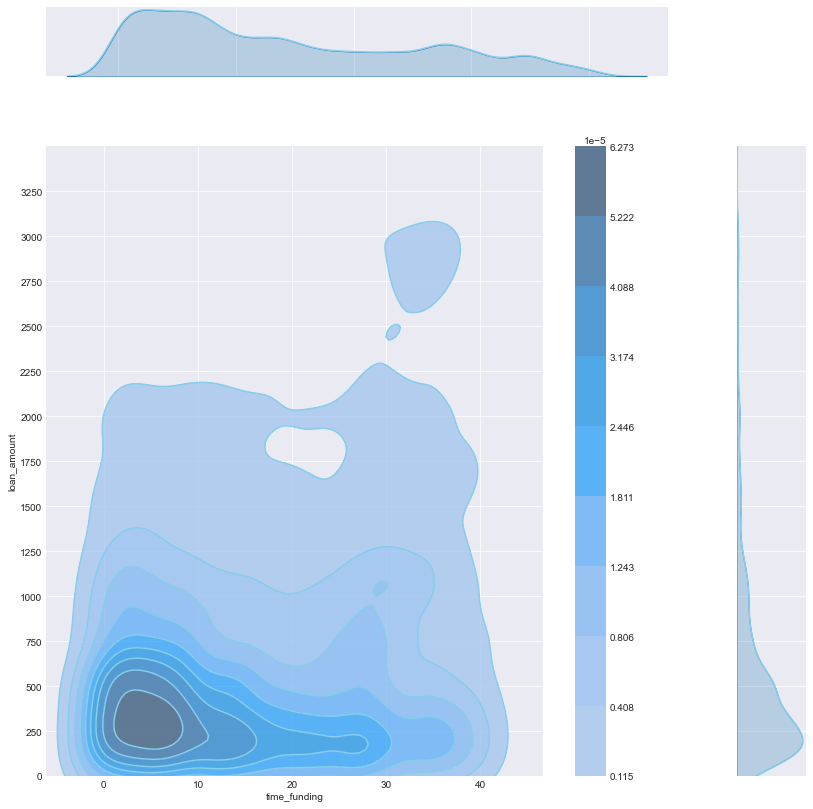

In [94]:
#%matplotlib inline

data = df_loans_dates_trimmed

g = sns.jointplot(x='time_funding', y='loan_amount', kind='kde', data=data, space= 1, color='skyblue')

g.plot_joint(sns.kdeplot, alpha=.8, shade=True, cbar=True)
g.plot_marginals(sns.kdeplot, shade=True)
g.fig.set_size_inches(12,12)
plt.ylim([0,3500])
g.ax_joint.set_yticks(np.arange(0, 3500, 250))


plt.show()

**Поясления к коду:**

- %matplotlib inline - указывает, что график необходимо построить все в той же оболочке Jupyter, но теперь он выводится как обычная картинка. Данный способ удобен тем, что позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы). В этом статическом режиме, никакие изменения не отобразятся до тех пор пока не будет выполнена команда plt.show(). 

- sns.jointplot - построение графика с помощью  JointGrid представлено ниже. sns.jointplot - удобный интерфейс для класса JointGrid

- kind - тип графика распределения, можно сделать разныe { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

- space - расстояние между графиками

- shade - заполняет графики 

- fig.set_size_inches - размер фигуры

- plt.ylim([0,3200]) - обрезает фигуру

- g.ax_joint.set_yticks(np.arange(0, 3500, 250)) - установление тиков


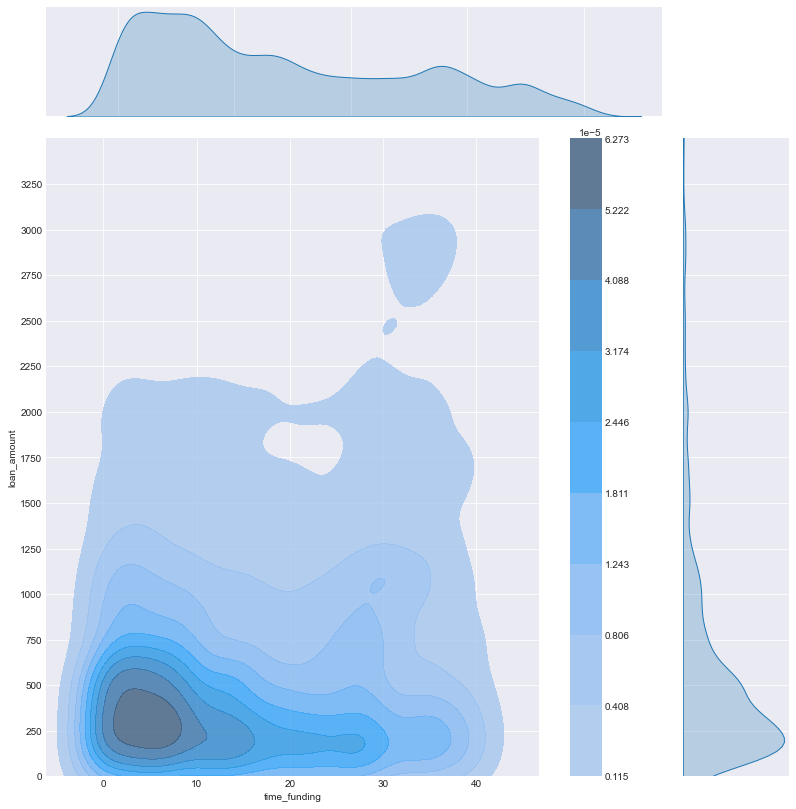

In [95]:
#%matplotlib inline

data = df_loans_dates_trimmed

g = sns.JointGrid(data=data, x='time_funding', y='loan_amount', ylim=(0, 3500))
g.plot_joint(sns.kdeplot, alpha=.8, shade=True, fill=True, cbar=True)
g.plot_marginals(sns.kdeplot, shade=True)
g.fig.set_size_inches(12,12)
g.ax_joint.set_yticks(np.arange(0, 3500, 250))

plt.show()

**Выводы:**

На тепловой карте области, выделенные одним цветом, содержат одинаковое количество заявок. При этом области с более насыщенными, темными цветами содержат бОльшее количество заявок, чем более светлые области. 

Действительно, возрастающее количество дней, требуемое для финансирования заявки можно объяснить возрастающей суммой, но только отчасти. 

Мы также можем видеть наличие большого количества заявок на суммы до $250 со сроком 20-35 дней. Kiva явно может предпринять что-то, чтобы люди чаще обращали внимание на такие заявки. 

### 2.5.3 Время ожидания и страны
______________

Давайте попробуем проверить наличие смещения интервалов ожидания по странам, т.е предположение о том, что заявки из ряда стран финансируются необоснованно долго, в силу тех или иных причин.

In [422]:
df_country_median = df_loans_dates_trimmed\
    .groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

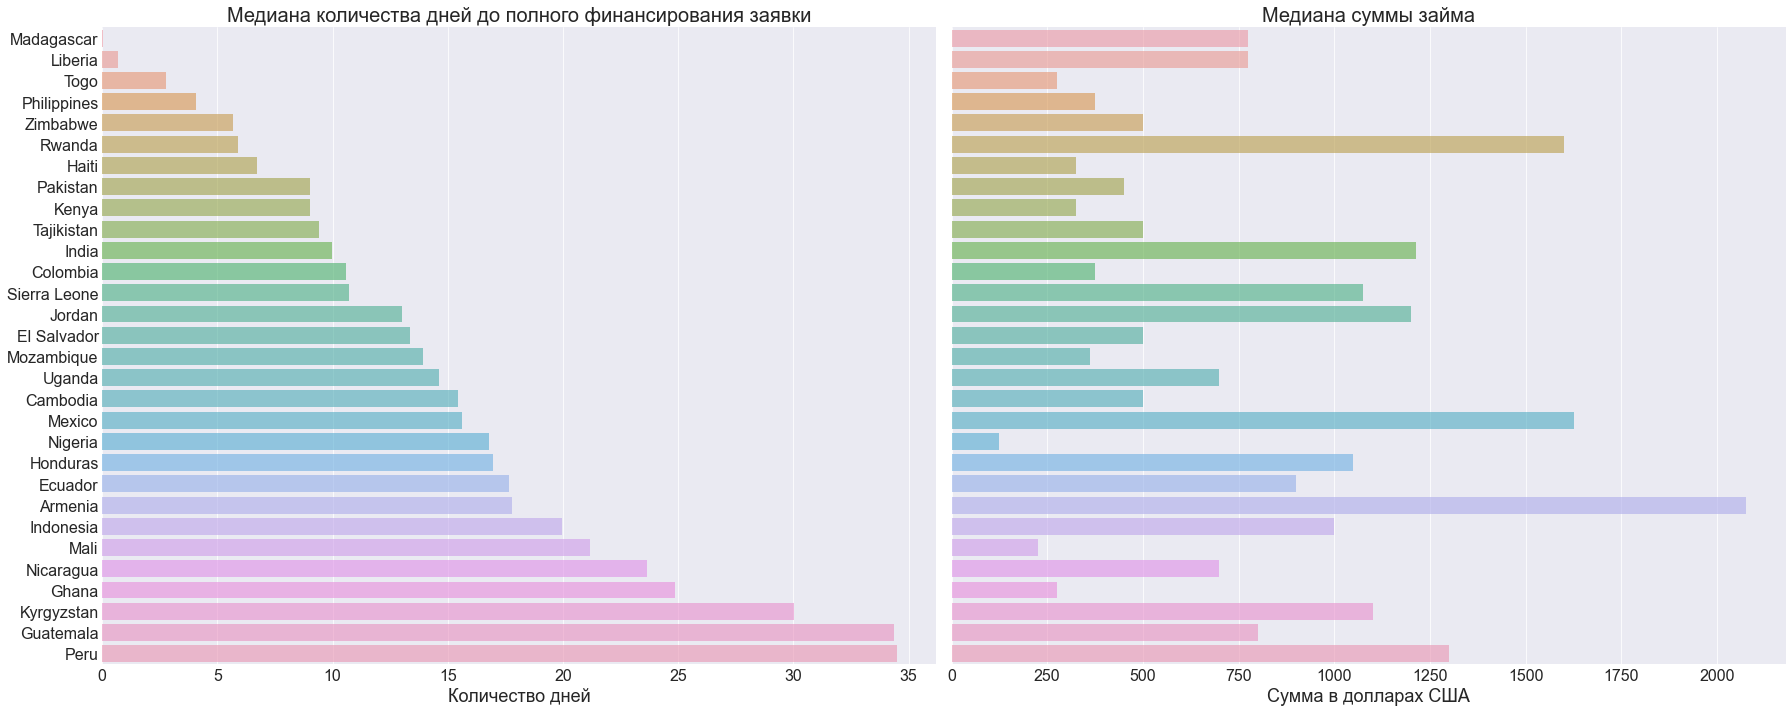

In [423]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(25, 10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title('Медиана количества дней до полного финансирования заявки', fontsize=20)
ax[0].set_xlabel('Количество дней', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title('Медиана суммы займа', fontsize=20)
ax[1].set_xlabel('Сумма в долларах США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

**Выводы:**

Действительно, прямой связи между временем ожидания финансирования и суммой займа не наблюдается.

В ряде стран с довольно большой медианнйо суммой займа наблюдаются короткие интервалы на сбор средств. 

- Либерия: 750 USD - 1 день.
- Руанда: 1600 USD - 5 дней.
- Индия: 1250 USD - 10 дней.

И наоборот, в нескеольких странах на сбор относительно небольших сумм требуется длительные промежутся времени: 

- Нигерия: 125 USD - 17 дней.
- Мали: 250 USD - 22 дня.
- Гана: 250 USD - 25 дней.

### 2.6. Сумма крудита и время погашения
_____

У нас есть еще один интересный разрез датасета - это информация о количестве месяцев, необходимых заемщикам для погашения своих кредитов.

Простое построение среднего/медианного времени погашения по стране может дать некоторую информацию, однако она может ввести в заблуждение.

Действительно, скажем, в стране А кредиты погашаются в среднем через 12 месяцев. а в стране В - через 15 месяцев. Если на этом остановиться, то можно было бы просто сказать, что людям в стране В в среднем нужно больше времени, чтобы погасить свои крудиты, по сравнению с людьми в стране А.

Теперь давайте предположим, что средняя сумма кредитов в стране А составляет 500 долларов, тогда как в стране В это 800 долларов, тогда это означает, что люди в стране А платят 41,66 в месяц, в то время как люди в стране В платят 51,33 в месяц.

Поэтому, что более важно - это соотношение суммы кредита и времени погашения . Это соотношение дает представление о том, сколько денег в месяц человек в данной стране может позволить себе тратить на погашение кредитов.

Теперь рассчитаем сумму ежемесячного платежа в разрезе стран:

In [425]:
df_country_median = df_country_median.sort_values(by='term_in_months')

df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

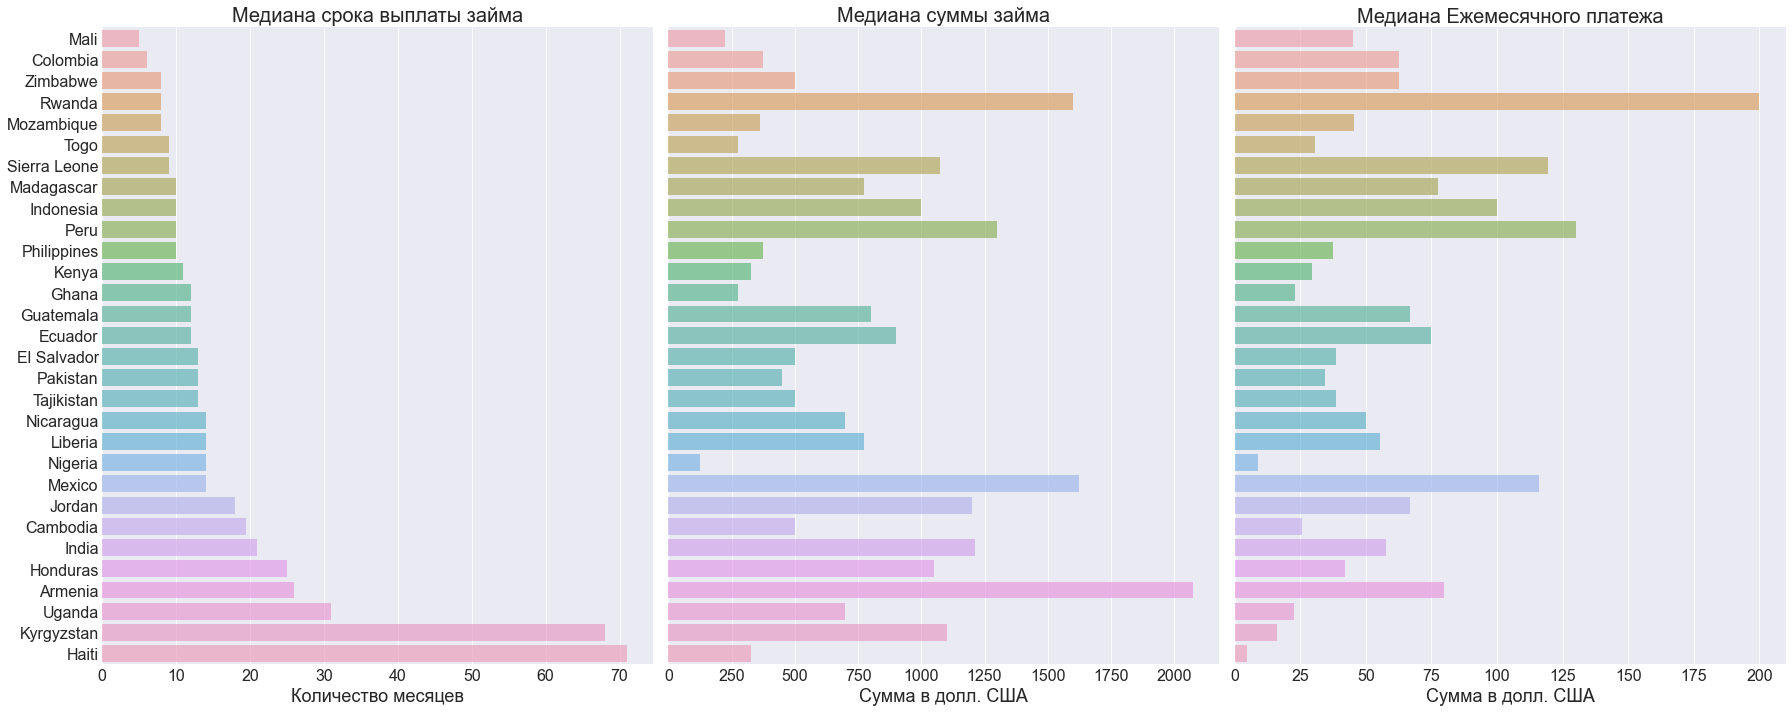

In [426]:
f, ax = plt.subplots(1, 3, sharey=True, figsize=(25, 10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title('Медиана срока выплаты займа', fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title('Медиана суммы займа', fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title('Медиана Ежемесячного платежа', fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

**Вывод:**

Перед нами наглядное представление о рейтинге беднейших стран, люди из которых пользуются платформой Kiva. Это страны, в которых люди могут позволить себе выплачивать суммы значительно меньшие, чем в других странах, а значит уровень бедности там выше. 

### Домашнее задание:

1. Зависимость пола заемщика от региона планеты, сектора экономики.

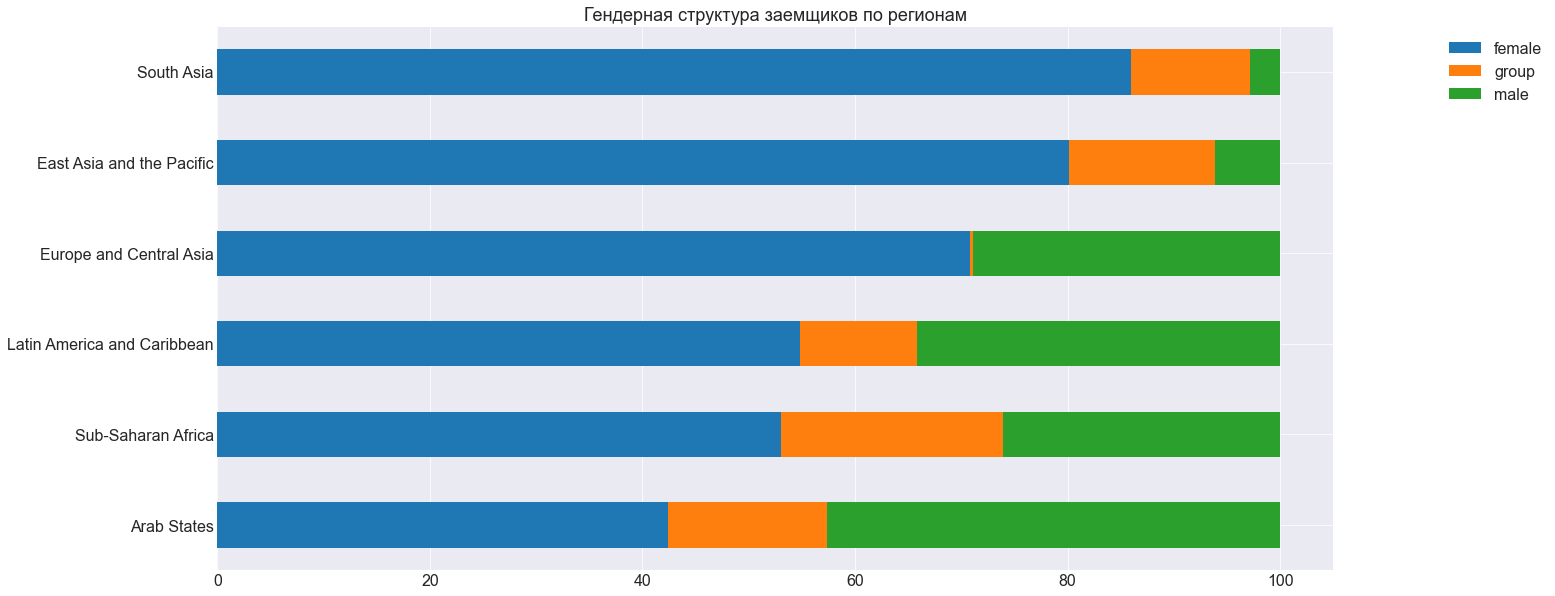

borrower_genders,female,group,male
world_region,,,
Arab States,42.444542,14.946189,42.609269
Sub-Saharan Africa,53.037095,20.887345,26.075560
Latin America and Caribbean,54.802221,11.019720,34.178059
Europe and Central Asia,70.791326,0.332620,28.876054
East Asia and the Pacific,80.169401,13.729472,6.101128
South Asia,85.979982,11.143786,2.876232


In [109]:
df_gender_by_region = \
    df_kiva_loans_trimmed\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack('borrower_genders') \
    .fillna(0)\
    .sort_values(by='female')


df_gender_by_region = df_gender_by_region[['female', 'group', 'male']]


plot = df_gender_by_region.plot.barh(
        figsize=(20, 10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по регионам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

df_gender_by_region

**Вывод:**

В всех регионах, кроме Арабских стран, большинство заемщиков - женщины. Возможно это связано с эмансипацией прав женщин и желанием женщин зарабатывать самостоятельно. 

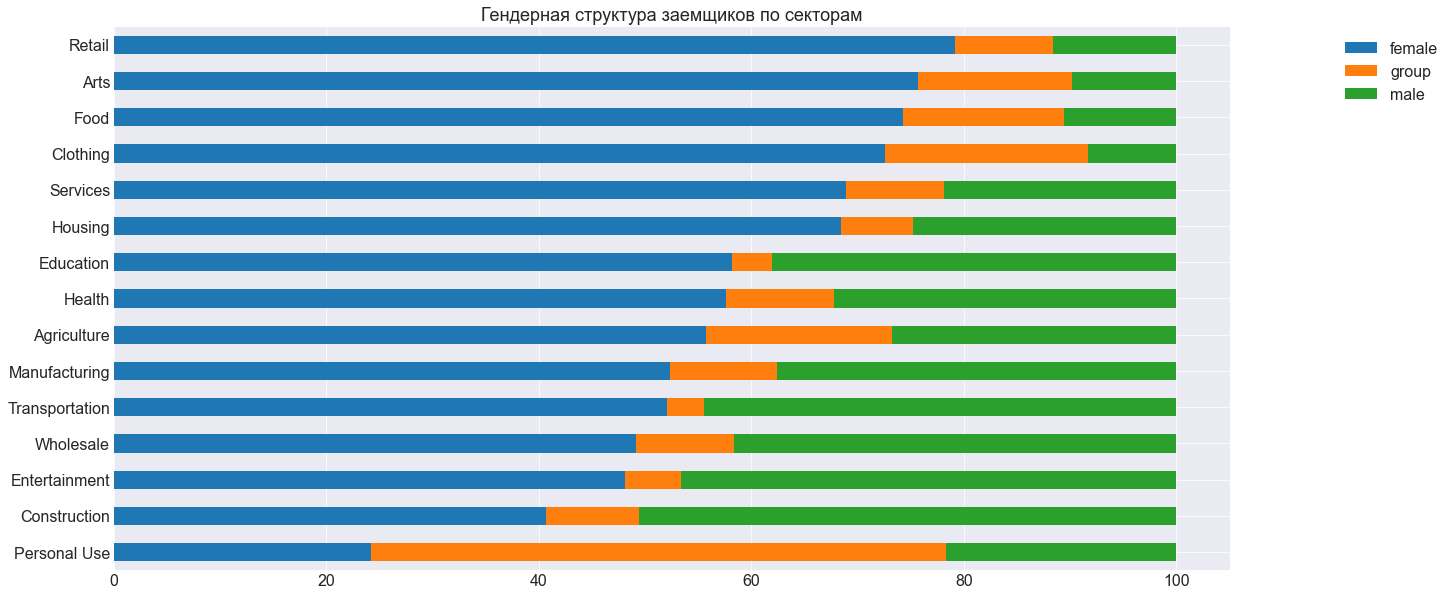

borrower_genders,female,group,male
sector,,,
Personal Use,24.197728,54.162991,21.639281
Construction,40.685790,8.770195,50.544016
Entertainment,48.137931,5.241379,46.620690
Wholesale,49.174917,9.240924,41.584158
Transportation,52.091081,3.418803,44.490115
Manufacturing,52.370796,10.024610,37.604594
Agriculture,55.718779,17.552467,26.728754
Health,57.636018,10.188806,32.175176
Education,58.232117,3.706008,38.061876


In [108]:
df_gender_by_sectors = \
    df_kiva_loans_trimmed\
    .groupby(['sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack('borrower_genders') \
    .fillna(0)\
    .sort_values(by='female')

df_gender_by_sectors = df_gender_by_sectors[['female', 'group', 'male']]


plot = df_gender_by_sectors.plot.barh(
        figsize=(20, 10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по секторам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

df_gender_by_sectors

**Выводы:**

Женщины преобладают в таких секторах как обслуживание, продажи, жилища, еда, одежда, искусство, образование, здоровье.

Мужчина преобладают в таких секторах как строительство, завлечения,транпорт.

Группы граждан чаще всего берут займы на персональные нужды.
____

2. Влияние такого атрибута займа как Количество кредиторов (lender_count) на суммы и сроки займов.


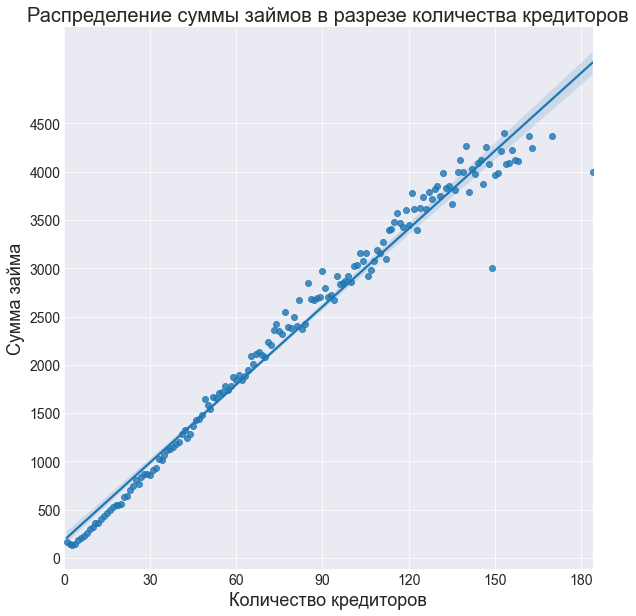

In [175]:
df_amount_by_lender = df_loans_dates_trimmed\
    .groupby(['lender_count'])\
    .agg('mean')\
    .reset_index()



sns.lmplot(x='lender_count', y='loan_amount', data=df_amount_by_lender, height=8)\
    .set(ylabel=None, xlabel='sdfgasdg')

plt.title('Распределение суммы займов в разрезе количества кредиторов', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_amount_by_lender['lender_count']), 30))
plt.yticks(np.arange(0, max(df_amount_by_lender['loan_amount']+500), 500))
plt.xlabel('Количество кредиторов', fontsize=18)
plt.ylabel('Сумма займа', fontsize=18)

plt.show()



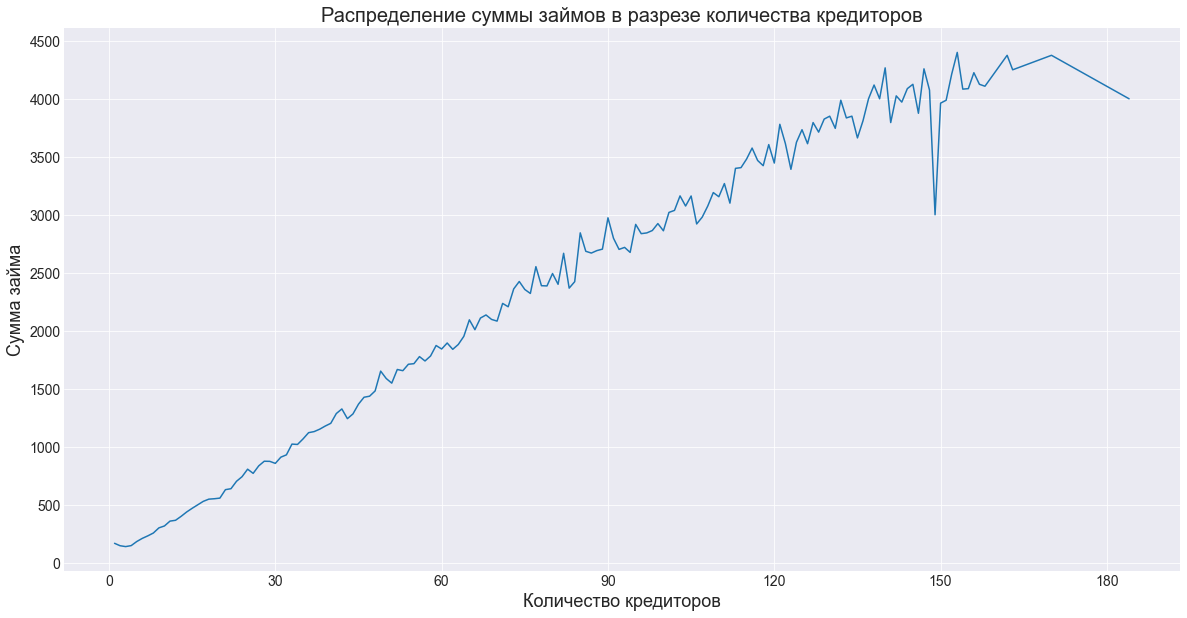

In [176]:
fig = plt.figure(figsize=(20, 10))

sns.lineplot(x='lender_count', y='loan_amount', data=df_amount_by_lender, sizes=(30,20))\
    .set(ylabel=None, xlabel=None)

plt.title('Распределение суммы займов в разрезе количества кредиторов', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_amount_by_lender['lender_count']), 30))
plt.yticks(np.arange(0, max(df_amount_by_lender['loan_amount']+500), 500))
plt.xlabel('Количество кредиторов', fontsize=18)
plt.ylabel('Сумма займа', fontsize=18)


plt.show()

**Вывод:** 

Закономерно прослеживается, что чем больше заемщиков, тем больше сумма кредита

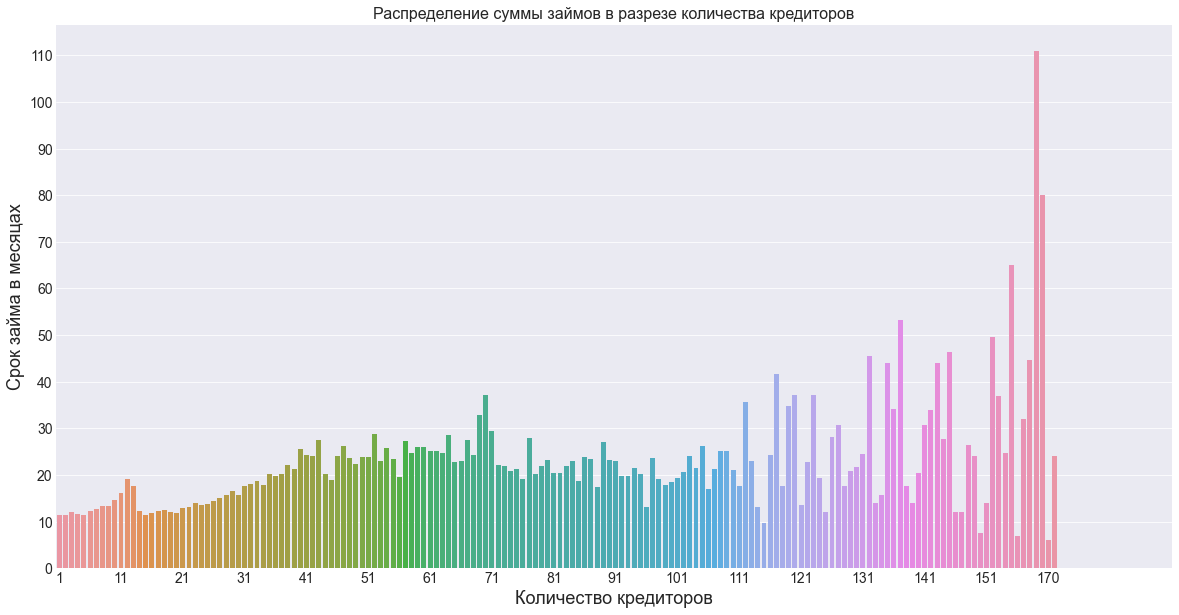

In [308]:
fig = plt.figure(figsize=(20, 10))

sns.barplot(x='lender_count', y='term_in_months', data=df_amount_by_lender)\
    .set(ylabel=None, xlabel=None)

plt.title('Распределение суммы займов в разрезе количества кредиторов', fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_amount_by_lender['lender_count']+1), 10))
plt.yticks(np.arange(0, max(df_amount_by_lender['term_in_months']+1), 10))
plt.xlabel('Количество кредиторов', fontsize=18)
plt.ylabel('Срок займа в месяцах', fontsize=18)

plt.show()

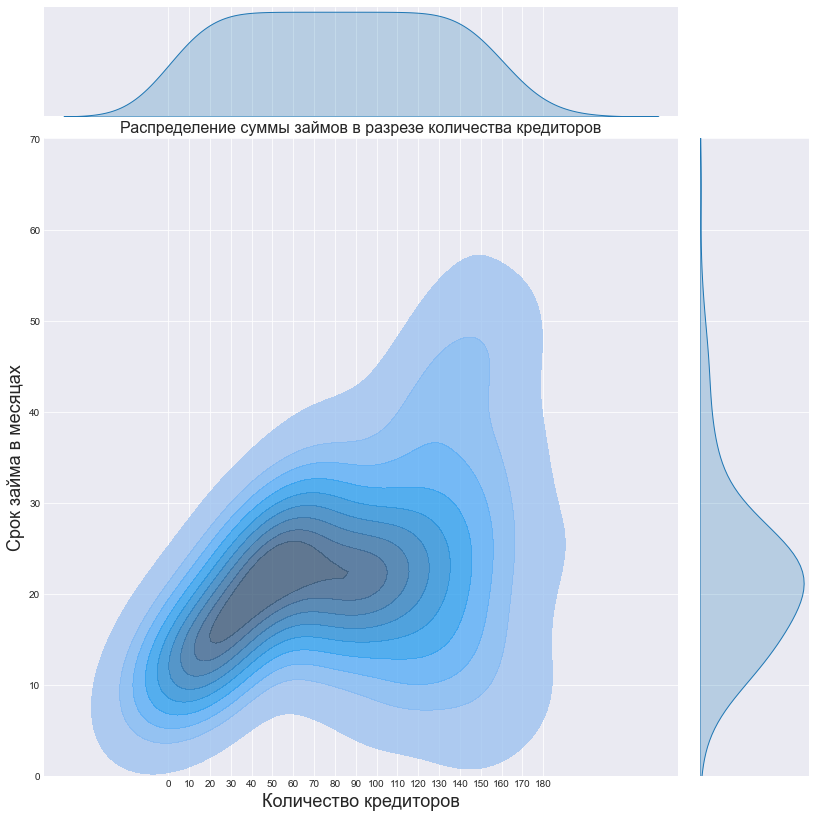

In [231]:
data = df_amount_by_lender

g = sns.JointGrid(data=data, x='lender_count', y='term_in_months', ylim=(0, 60))
g.plot_joint(sns.kdeplot, alpha=.8, shade=True, fill=True)
g.plot_marginals(sns.kdeplot, shade=True)
g.fig.set_size_inches(12,12)
g.ax_joint.set_yticks(np.arange(0, 71, 10))
g.ax_joint.set_xticks(np.arange(0, 190, 10))
g.ax_joint.set_title('Распределение суммы займов в разрезе количества кредиторов', fontsize=16)
g.ax_joint.set_xlabel('Количество кредиторов', fontsize=18)
g.ax_joint.set_ylabel('Срок займа в месяцах', fontsize=18)

plt.show()

In [232]:
df_amount_by_lender['lender_count'].quantile(0.5)

81.5

**Вывод:**

Здесь явно прослеживается нормальное распределение. Это свидетельствует о том, что большинство значений тяготеют к 82 заемщикам и к 21 месяцу срока. 

________

3. Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

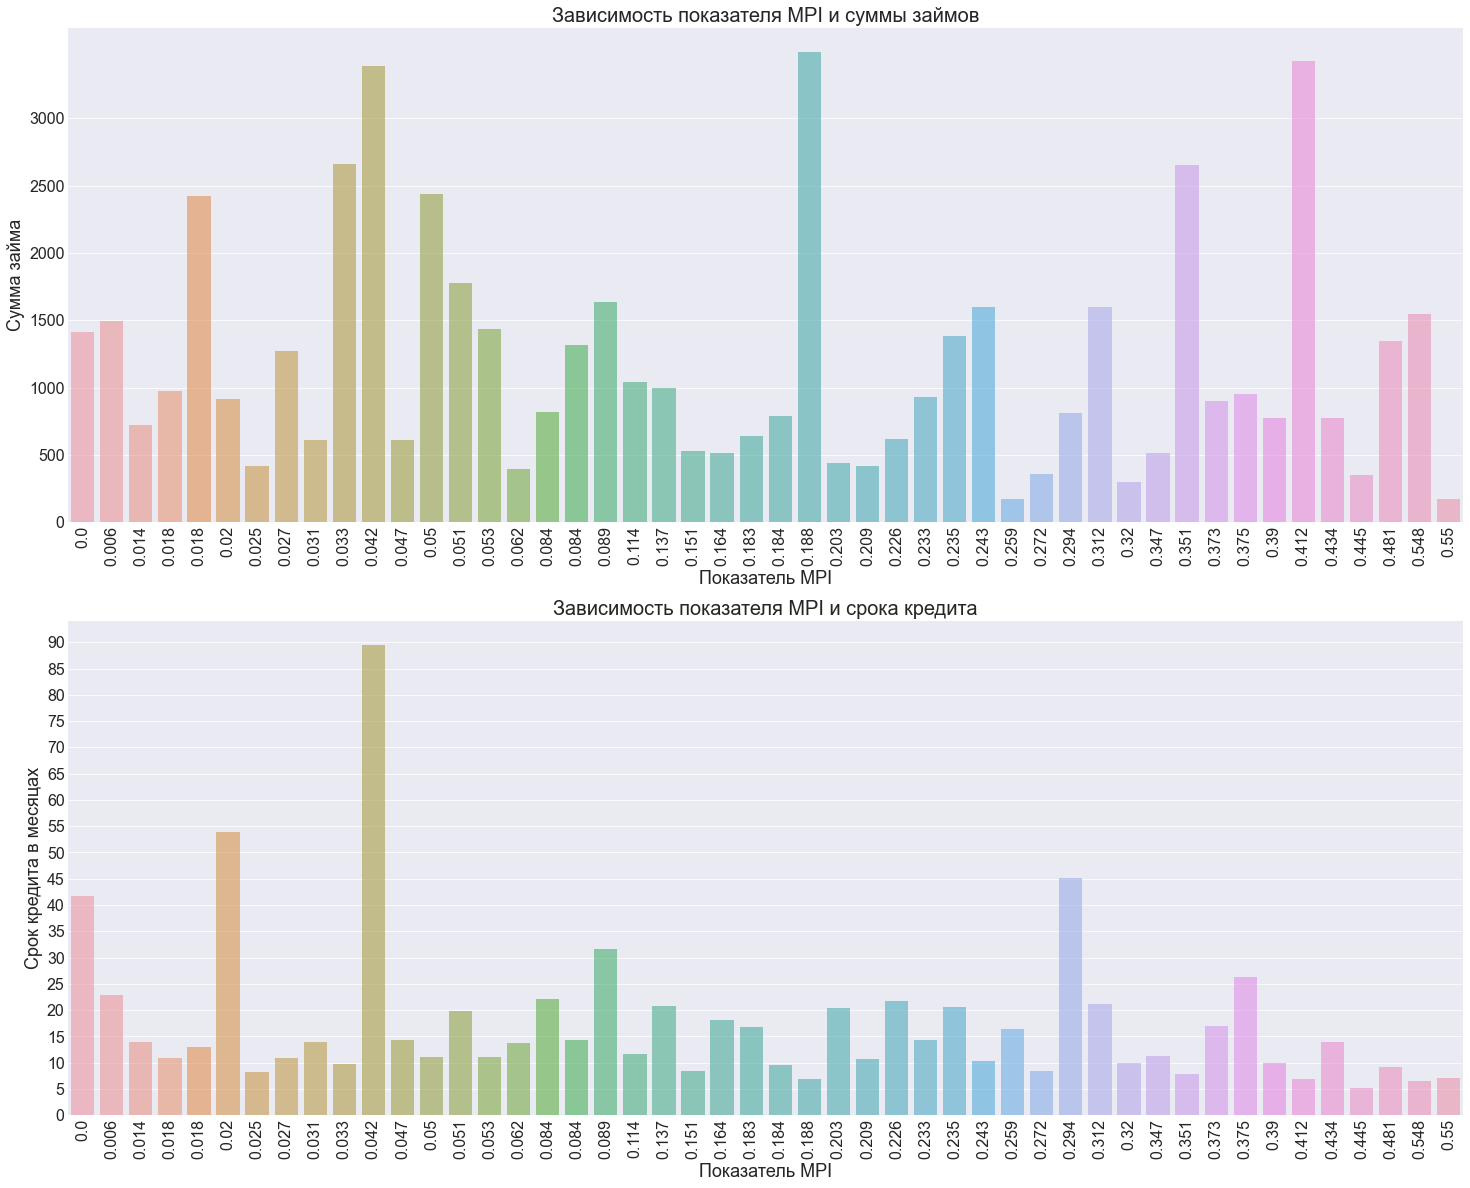

In [448]:
df_amount_by_mpi = df_loans_dates_trimmed\
    .dropna(subset=['MPI', 'loan_amount', 'term_in_months'], how='any', inplace=False)\
    .groupby(['MPI'])\
    .agg('mean')\
    .reset_index()

df_amount_by_mpi

fig, ax = plt.subplots(2, 1, figsize=(25, 20))

sns.barplot(y='loan_amount', x='MPI', data=df_amount_by_mpi, alpha=0.6, ax=ax[0])
ax[0].set_title('Зависимость показателя MPI и суммы займов', fontsize=20)
ax[0].set_xticks(np.arange(48))
ax[0].set_xticklabels(list([round(x, 3) for x in df_amount_by_mpi['MPI']]), rotation=90)
ax[0].set_yticks(np.arange(0, max(df_amount_by_mpi['loan_amount']+1), 500))
ax[0].tick_params(labelsize=16)
ax[0].set_xlabel('Показатель MPI', fontsize=18)
ax[0].set_ylabel('Сумма займа', fontsize=18)

sns.barplot(y='term_in_months', x='MPI', data=df_amount_by_mpi, alpha=0.6, ax=ax[1])
ax[1].set_title('Зависимость показателя MPI и срока кредита', fontsize=20)
ax[1].set_xticks(np.arange(48))
ax[1].set_xticklabels(list([round(x, 3) for x in df_amount_by_mpi['MPI']]), rotation=90)
ax[1].set_yticks(np.arange(0, max(df_amount_by_mpi['term_in_months']+1), 5))
ax[1].tick_params(labelsize=16)
ax[1].set_xlabel('Показатель MPI', fontsize=18)
ax[1].set_ylabel('Срок кредита в месяцах', fontsize=18)


plt.show()


**Выводы:**

Особой связи не наблюдается, прослеживаются отчетливые пики на некоторых значений. Таким образом можно сделать вывод, индекс бедности не влияет на срок кредита и на его размер. 

In [443]:
df_kiva_loans_trimmed_mpi = df_kiva_loans_trimmed\
    .dropna(subset=['MPI', 'loan_amount', 'term_in_months'], how='any', inplace=False)\
    .groupby('country')\
    .mean()\
    .reset_index()

df_kiva_loans_trimmed_mpi = df_kiva_loans_trimmed_mpi[df_kiva_loans_trimmed_mpi.country.isin(list_countries)].sort_values(by='MPI')

order_1 = list(df_kiva_loans_trimmed_mpi['country'])

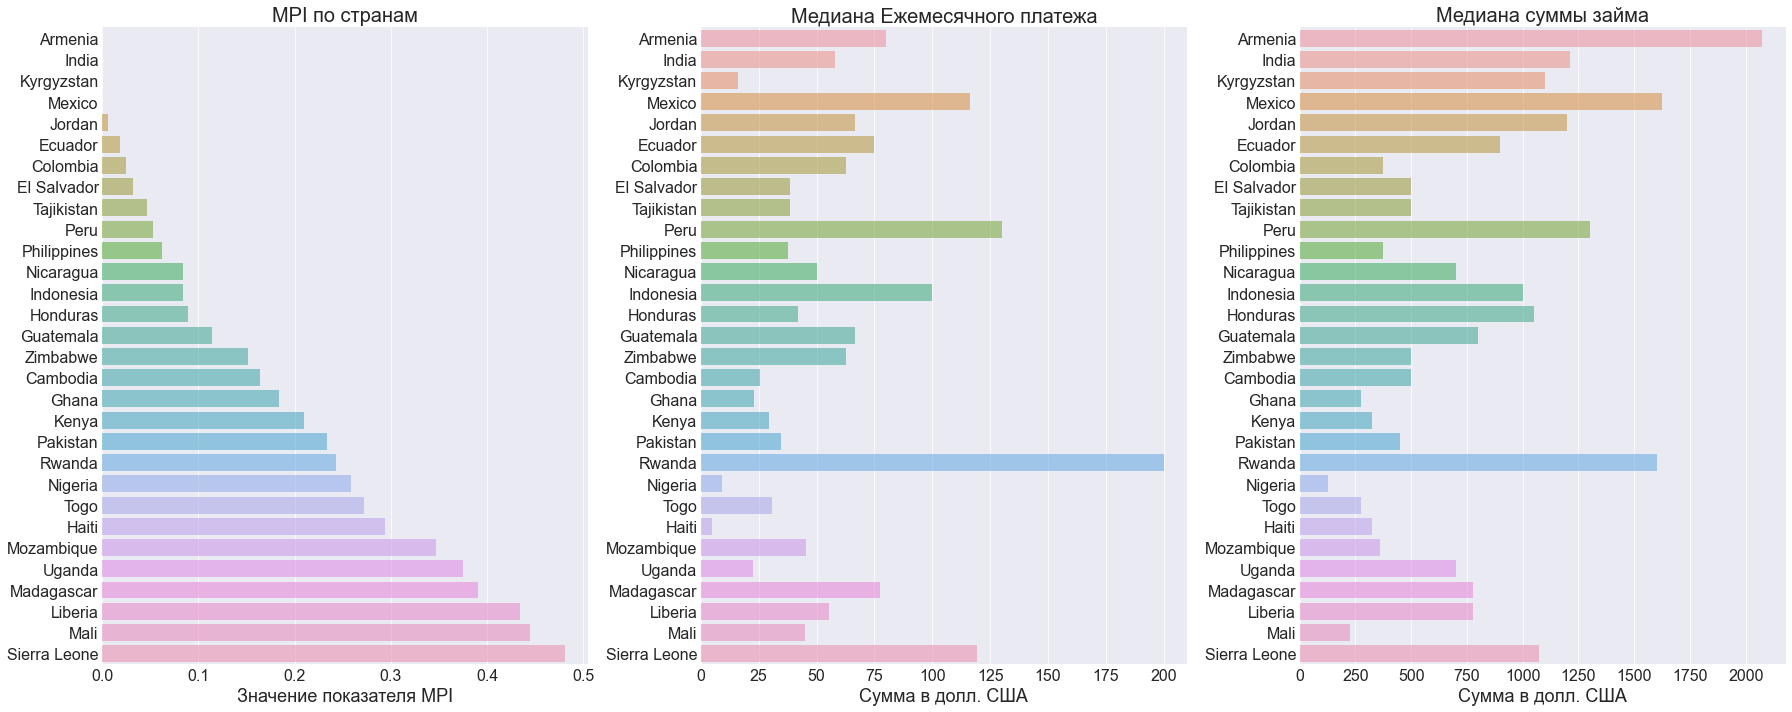

In [446]:
fig, ax  = plt.subplots(1, 3, figsize=(25,10))

sns.barplot(y='country', x='MPI', data=df_kiva_loans_trimmed_mpi, alpha=0.6, ax=ax[0])
ax[0].set_title('MPI по странам', fontsize=20)
ax[0].set_xlabel('Значение показателя MPI', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[1], order=order_1)
ax[1].set_title('Медиана Ежемесячного платежа', fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[2], order=order_1)
ax[2].set_title('Медиана суммы займа', fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)


plt.tight_layout()
plt.show()

**Выводы:**

Здесь также особой связи не наблюдается. Страны с наименьшим индексом бедности могут иметь маленький ежемесячный платеж, страны с наибольшим индексом бедности могут иметь крупные ежемесячные платежи. 
____

4. Зависимости таких метрик как сумма займа, срок займа, время финансирования заявки, ежемесячный платеж в разрезе макрорегионов.


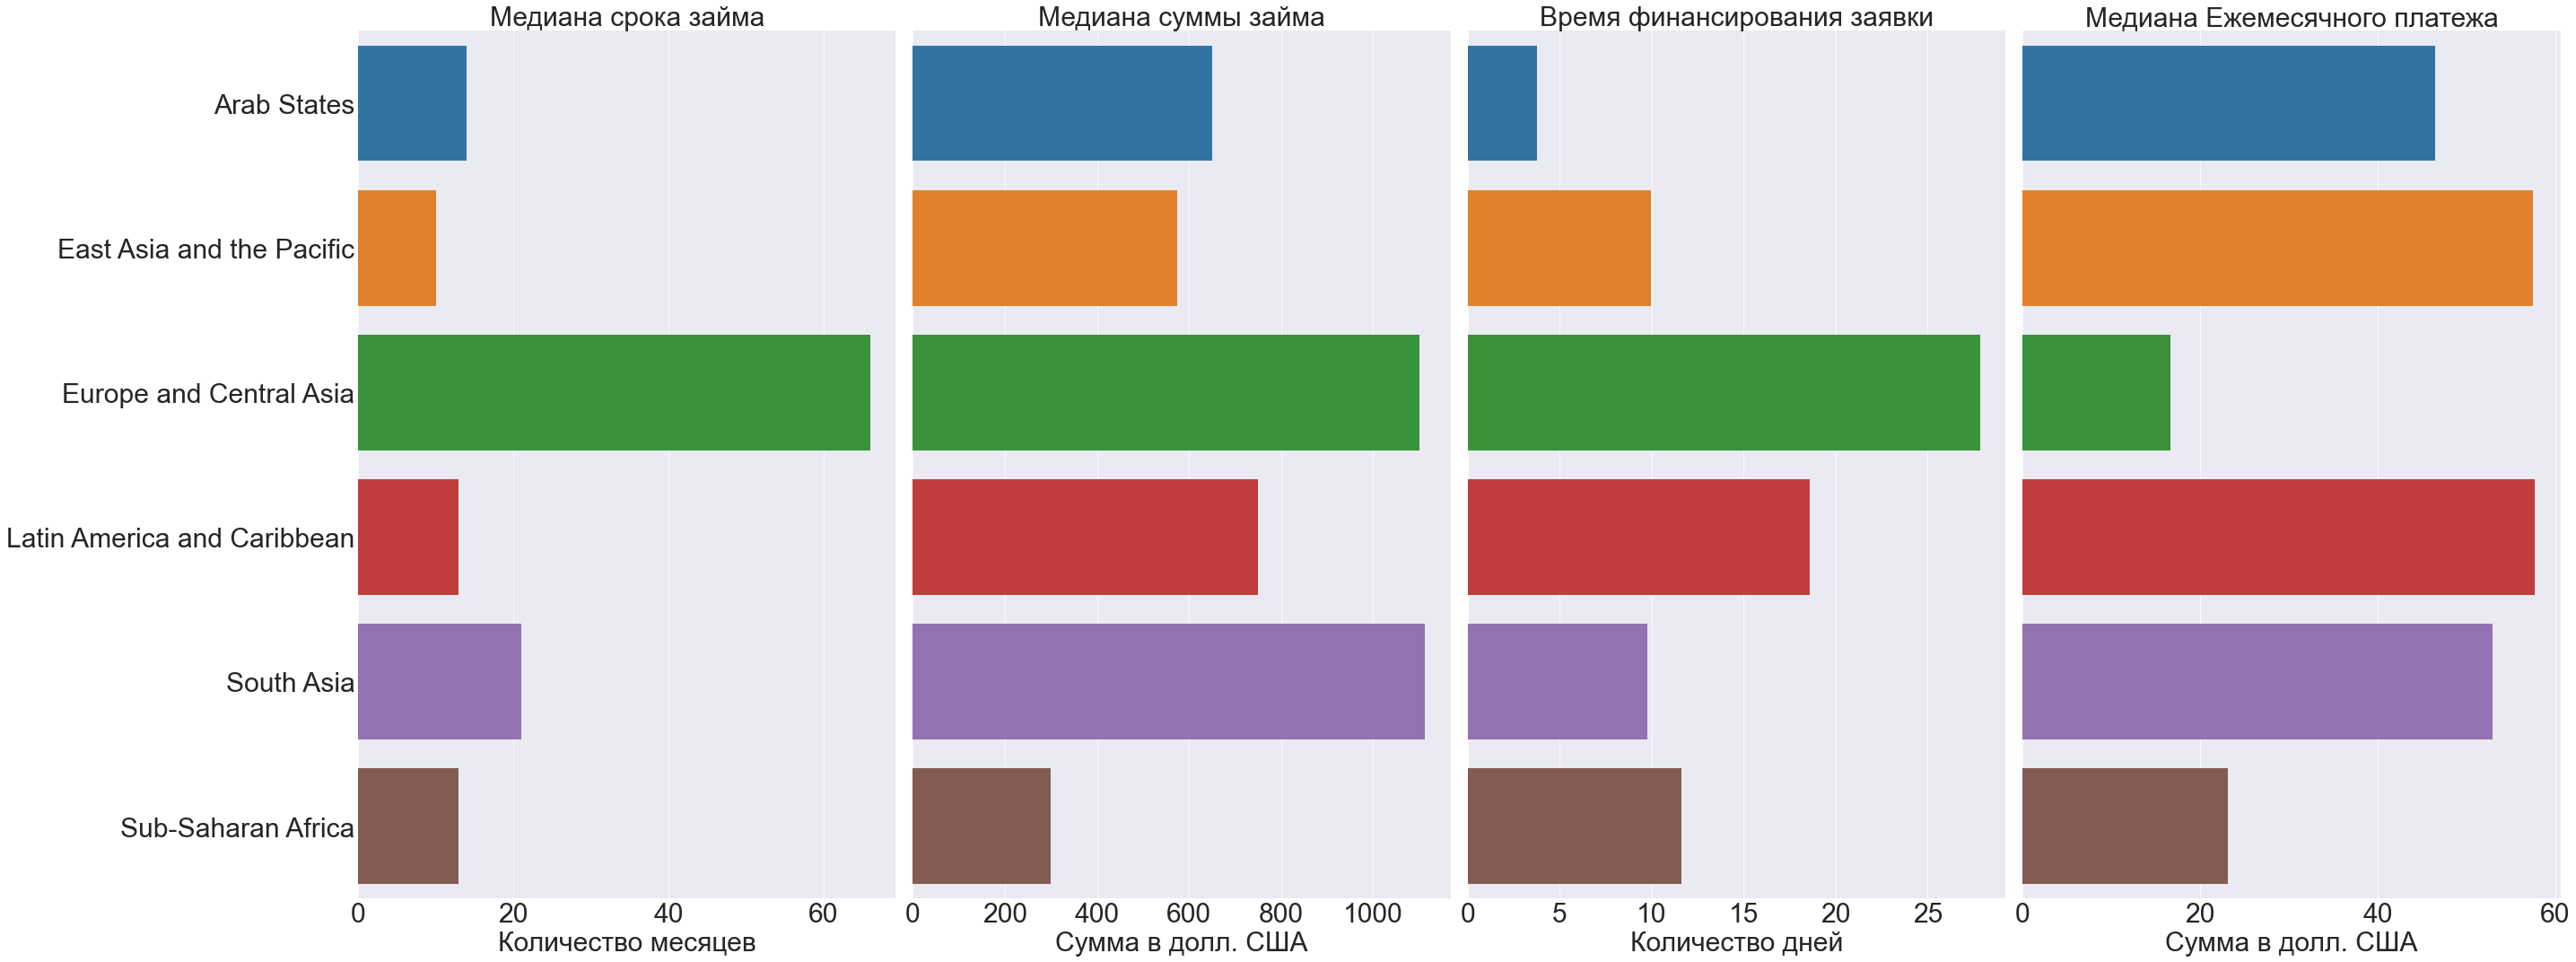

In [465]:
df_world_median = df_loans_dates_trimmed\
    .groupby(['world_region'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_world_median['monthly_repayment'] = df_world_median['loan_amount'] / df_world_median['term_in_months']

f, ax = plt.subplots(1, 4, sharey=True, figsize=(40, 15))

sns.barplot(y='world_region', x='term_in_months', data=df_world_median, ax=ax[0])
ax[0].set_title('Медиана срока займа', fontsize=30)
ax[0].set_xlabel('Количество месяцев', fontsize=30)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=30)

sns.barplot(y='world_region', x='loan_amount', data=df_world_median, ax=ax[1])
ax[1].set_title('Медиана суммы займа', fontsize=30)
ax[1].set_xlabel('Сумма в долл. США', fontsize=30)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=30)

sns.barplot(y='world_region', x='time_funding', data=df_world_median, ax=ax[2])
ax[2].set_title('Время финансирования заявки', fontsize=30)
ax[2].set_xlabel('Количество дней', fontsize=30)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=30)

sns.barplot(y='world_region', x='monthly_repayment', data=df_world_median, ax=ax[3])
ax[3].set_title('Медиана Ежемесячного платежа', fontsize=30)
ax[3].set_xlabel('Сумма в долл. США', fontsize=30)
ax[3].set_ylabel(None)
ax[3].tick_params(labelsize=30)

plt.tight_layout()
plt.show()

**Выводы:**

1. В Европе и Центральной Азии берут большие суммы на большой строк, в то вреям как в Южной Азии и Латинской Америке берут большие суммы на короткий срок.
2. Корреляции между временем финансирования и другими показателями не наблюдается.

## Общие выводы:
___

### 1. Что было проделано?
____

1. Оценили качество данных, проверили наличие пустых и пропущенных значений, наличие выбросов, предельных значений. 
2. Выявили базовые характеристика датасета, построили описательные статистики по каждой из колонок.
3. Выяснили демографические характеристики заемщиков, распределение пола, из каких регионов. 
4. Выявили распределение количества займов по секторам экономики и видам деятеьности. 
5. Выявили регионы аутсайдеры и регионы лидеры по количеству займов и заявок, а так же посмотрели распределение сумм этих заявок по регионам.
6. Изучили время финансирования заявок. Мы выянили, что существует сегмет заявок, время финансирования которых значительно больше чем у остальных сегментов. При том, что сумма в них сопоставима с другими. 
7. Выяснили, что оценивать страну только по количеству месяцев погашения кредита неверно. Гораздо более интересной метрикой стало среднее количество денежных средств, которые человек в той или иной стране готов и способен выплачивать.
8. После каждого исследованного вопроса мы формулировали свои предварительные выводы и заключения. 

### 2. Предварительные тезисы и наблюдения:
______

1. Важнейшая **роль площадки Kiva** и ее сообщества для многих стран.
2. Явное **наличие неравенства** среди стран и регионов планеты. Разные показатели уровня бедности и благосостояния населения.
3. Использование **небольших по сумме и коротких по сроку погашения** займов в ряде стран: Филиппины, Камбоджа.
4. Наличие стран и регионов с нарушением **гендерного баланса** заемщиков.
5. Большое количество заявок в **сырьевых, непроизводственных секторах и сфера услуг**.
6. Высокая доля заявок, направленных на удовлетворение самых **базовых человеческих потребностей** в ряде стран.
7. Наличие коллективных заявок на **долгосрочные продукты** с привлечением крупных сумм. 
8. Низкое проникновение Kiva в ряде регионов и стран, таких как **Южная Азия** и, в частности, **Пакистан и Индия**.
9. Нередки случаи **проявления неравенства между странами**: длительные ожидания финансирования для части заявок с совсем небольшими суммами.

### 3.  Результаты и выводы.
________
Пора подвести основные итоги и сделать выводы, которые могут быть полезны и интересны не только организаторам платформы Kiva, но и всему сообществу неравнодушных людей, которые стремятся сделать этот мир немного лучше: 

1. Прежде всего необходимо отметить очень важную и знаменательную роль площадки Kiva и ее сообщества. Для большого числа людей в совершенно разных частях нашей планеты Kiva играет важнейшую роль в части **поддержки операционной и хозяйственной деятельности**, активно дополняя, а часто выступая в роли частного банковского сектора.

2. В каждый момент времени стоит оказывать **адресную помощь** странам и регионам, которые больше всего **недофинансированы** относительно других. Это страны с высоким уровнем бедности, в которых люди могут позволить себе выплачивать суммы значительнор меньшие, чем в других странах. Как никогда стоит обратить внимание сообщества Kiva и направить усилия на **поддержку самых нуждающихся!** Такие заявки могут быть отражены в отдельных категориях и включать призывы в свои заголовки: Неотложные нужды, Срочно, Истекает срок финансирования.

3. Использую положительный опыт Филиппин, стоит стимулировать рост выдачи небольших по сумме и сроку погашения займов, которые обеспечат **бОльшую занятость** населения и рост **деловой активности**. По возможности, стоит делить заявки из небогатых стран на небольшие и короткие займы, каждый из которых будет очередным маленьким шагом в большом деле.

4. Когда дело касается возможностей для развития человека - границы междый мужчинами и женщинами стираются. Стоит стремиться к обеспечению доступа к финансированию для **женщин и мужчин в равной степени** и обратить внимание на те страны и регионы, где пока этот баланс нарушен. Например, для таких стран как Самоа, Либерия, Того, выводить на главную страницу сначала займы от мужчин. Отличным шагом станет публикация личных историй и примеров женщин и мужчин, например, в **интернет-издательствах, блоггинг платформах**, таких как medium.com, а также видеоблоге Kiva на YouTube.com

5. Приоритетными должны становиться заявки, направленные на развитие отраслей с **высокой добавленной стоимостью и стимулирование производств**, так как они являются движущей силой и по цепочке начинают задействовать другие отрасли. А именно Строительство, Производство, Легкая промышленность. Здесь очень кстати будет использование **умных рекомендательных систем** на сайте Kiva.org, которые с бОльшей вероятностью будут подсказывать такие заявки. 

6. Все еще довольна высока доля заявок, направленных на удовлетворение самых **базовых человеческих потребностей**. Такие просьбы не должны оставаться незамеченными, но быть первыми кандидатами на главной странице. Недопустимы такие ситуации, когда, например, в Нигерии люди ждут жизненно важную чистую воду по 10 дней. Дайджест таких заявок можно включить в **регулярные почтовые рассылки** всем участникам сообщества Kiva, когда-либо принимавшим участие в финансировании проектов.

7. Финансирование заявок на **крупные суммы и долгосрочные проекты** тоже работает. Для части стран возможность использовать Kiva будет играть решающую роль в формировании и реализации инфраструктурных и системообразующих проектов.

8. Для ряда регионов и стран присутствие таких как **Южная Азия** и, в частности, **Пакистан и Индия**, есть отличные перспективы для расширения присутствия и деятельности со стороны сообщества Kiva.

9. Нередки случаи **проявления неравества между станами**, таких как, например, длительные ожидания финансирования для части заявок с совсем небольшими суммами. Мы уверены, что в силах организаторов платформы Kiva и сообщества **сглаживать такие явные неравенства**, регулируя результаты поисковой выдачи, наполнение рассылок и рекомендуемых заявок для участников сообщества.